# WORKING DOC

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'str'>
Kraken secren data type: <class 'str'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [4]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['LINK/AUD']['symbol']
# crypto_details

'LINK/AUD'

### Fetch Historical Data for LINK/USDT
Note: Other options include ADA, BCH, DAI, DOT, EOS, ETH, LINK, LTC, USDC, BTC, DOGE and XRP

In [5]:
# Fetch daily candlestick bar data from `LINK/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620716400000, 46.15898, 46.29884, 46.00106, 46.29884, 2002.38609183]

In [6]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume
0  1620709200000  45.92392  46.16521  44.82914  45.18302   748.043652
1  1620712800000  45.33245  46.30187  45.33245  46.22390   898.658697
2  1620716400000  46.15898  46.29884  46.00106  46.29884  2002.386092
3  1620720000000  46.32687  46.37596  45.47682  45.60073  1042.521050
4  1620723600000  45.81917  47.33502  45.81917  47.28453  1869.926187

'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [7]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume  \
0  1620709200000  45.92392  46.16521  44.82914  45.18302   748.043652   
1  1620712800000  45.33245  46.30187  45.33245  46.22390   898.658697   
2  1620716400000  46.15898  46.29884  46.00106  46.29884  2002.386092   
3  1620720000000  46.32687  46.37596  45.47682  45.60073  1042.521050   
4  1620723600000  45.81917  47.33502  45.81917  47.28453  1869.926187   

                 date  
0 2021-05-11 05:00:00  
1 2021-05-11 06:00:00  
2 2021-05-11 07:00:00  
3 2021-05-11 08:00:00  
4 2021-05-11 09:00:00

'_________________________'

'historical_prices_df shape: (720, 7)'

In [8]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 05:00:00  1620709200000  45.92392  46.16521  44.82914  45.18302   
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   
2021-05-11 08:00:00  1620720000000  46.32687  46.37596  45.47682  45.60073   
2021-05-11 09:00:00  1620723600000  45.81917  47.33502  45.81917  47.28453   
...                            ...       ...       ...       ...       ...   
2021-06-10 00:00:00  1623283200000  25.60268  25.70171  25.03294  25.05017   
2021-06-10 01:00:00  1623286800000  25.41931  25.45095  25.08719  25.08719   
2021-06-10 02:00:00  1623290400000  24.97692  25.05033  24.93715  25.05033   
2021-06-10 03:00:00  1623294000000  25.06000  25.35015  24.82237  24.82237   
2021-06-10 04:00:00  1623297600000  24.81572  24.84165  24.76134  24.84010   

                          volume                date  
date                                                  
2021-05-11 05:00:00   748.043652 2021-05-11 05:00:00  
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00  
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00  
2021-05-11 08:00:00  1042.521050 2021-05-11 08:00:00  
2021-05-11 09:00:00  1869.926187 2021-05-11 09:00:00  
...                          ...                 ...  
2021-06-10 00:00:00  2059.138769 2021-06-10 00:00:00  
2021-06-10 01:00:00   567.560963 2021-06-10 01:00:00  
2021-06-10 02:00:00   223.077799 2021-06-10 02:00:00  
2021-06-10 03:00:00  1488.772727 2021-06-10 03:00:00  
2021-06-10 04:00:00    27.257551 2021-06-10 04:00:00  

[720 rows x 7 columns]

### Plot Daily Returns

In [9]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   
2021-05-11 08:00:00  1620720000000  46.32687  46.37596  45.47682  45.60073   
2021-05-11 09:00:00  1620723600000  45.81917  47.33502  45.81917  47.28453   
2021-05-11 10:00:00  1620727200000  47.36035  47.59029  46.95452  46.95452   
...                            ...       ...       ...       ...       ...   
2021-06-10 00:00:00  1623283200000  25.60268  25.70171  25.03294  25.05017   
2021-06-10 01:00:00  1623286800000  25.41931  25.45095  25.08719  25.08719   
2021-06-10 02:00:00  1623290400000  24.97692  25.05033  24.93715  25.05033   
2021-06-10 03:00:00  1623294000000  25.06000  25.35015  24.82237  24.82237   
2021-06-10 04:00:00  1623297600000  24.81572  24.84165  24.76134  24.84010   

                          volume                date  daily_return  
date                                                                
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  
2021-05-11 08:00:00  1042.521050 2021-05-11 08:00:00     -0.015078  
2021-05-11 09:00:00  1869.926187 2021-05-11 09:00:00      0.036925  
2021-05-11 10:00:00  2039.965108 2021-05-11 10:00:00     -0.006979  
...                          ...                 ...           ...  
2021-06-10 00:00:00  2059.138769 2021-06-10 00:00:00     -0.015710  
2021-06-10 01:00:00   567.560963 2021-06-10 01:00:00      0.001478  
2021-06-10 02:00:00   223.077799 2021-06-10 02:00:00     -0.001469  
2021-06-10 03:00:00  1488.772727 2021-06-10 03:00:00     -0.009100  
2021-06-10 04:00:00    27.257551 2021-06-10 04:00:00      0.000714  

[719 rows x 8 columns]

### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [10]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   
2021-05-11 08:00:00  1620720000000  46.32687  46.37596  45.47682  45.60073   
2021-05-11 09:00:00  1620723600000  45.81917  47.33502  45.81917  47.28453   
2021-05-11 10:00:00  1620727200000  47.36035  47.59029  46.95452  46.95452   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  46.223900   
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  46.262812   
2021-05-11 08:00:00  1042.521050 2021-05-11 08:00:00     -0.015078  46.024920   
2021-05-11 09:00:00  1869.926187 2021-05-11 09:00:00      0.036925  46.377079   
2021-05-11 10:00:00  2039.965108 2021-05-11 10:00:00     -0.006979  46.511004   

                        EMA_20     EMA_50    EMA_200  crossover_long_9v20  \
date                                                                        
2021-05-11 06:00:00  46.223900  46.223900  46.223900                  0.0   
2021-05-11 07:00:00  46.262019  46.261630  46.261435                  1.0   
2021-05-11 08:00:00  46.033907  46.038269  46.040436                  0.0   
2021-05-11 09:00:00  46.363000  46.356343  46.353078                  1.0   
2021-05-11 10:00:00  46.489643  46.479318  46.474202                  1.0   

                     crossover_short_9v20  crossover_signal_9v20  \
date                                                               
2021-05-11 06:00:00                   0.0                    0.0   
2021-05-11 07:00:00                   0.0                    1.0   
2021-05-11 08:00:00                  -1.0                   -1.0   
2021-05-11 09:00:00                   0.0                    1.0   
2021-05-11 10:00:00                   0.0                    1.0   

                     crossover_long_50v200  crossover_short_50v200  \
date                                                                 
2021-05-11 06:00:00                    0.0                     0.0   
2021-05-11 07:00:00                    1.0                     0.0   
2021-05-11 08:00:00                    0.0                    -1.0   
2021-05-11 09:00:00                    1.0                     0.0   
2021-05-11 10:00:00                    1.0                     0.0   

                     crossover_signal_50v200  
date                                          
2021-05-11 06:00:00                      0.0  
2021-05-11 07:00:00                      1.0  
2021-05-11 08:00:00                     -1.0  
2021-05-11 09:00:00                      1.0  
2021-05-11 10:00:00                      1.0

In [11]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

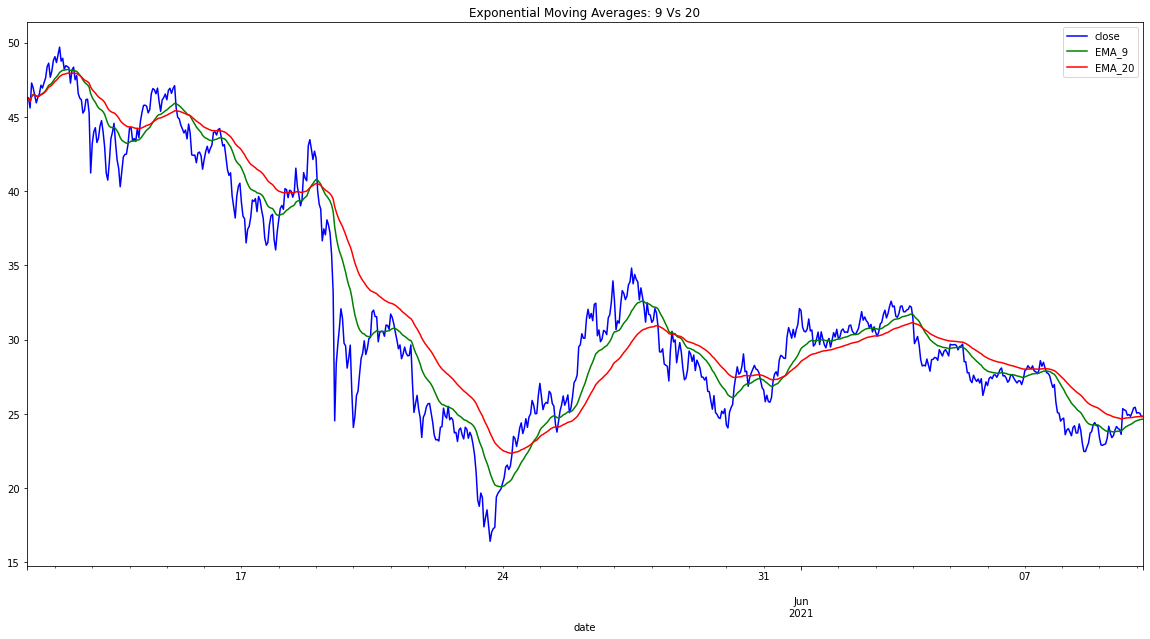

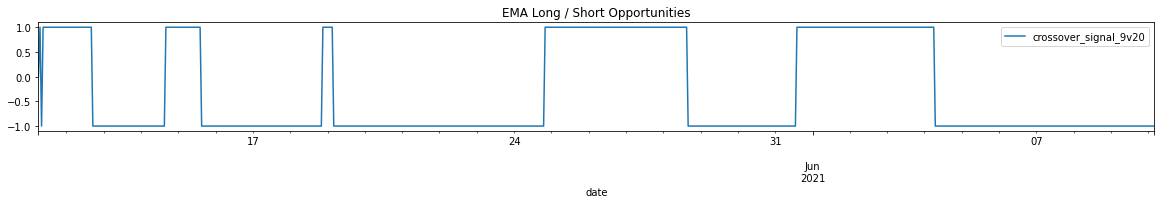

In [12]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])
plt.title('Exponential Moving Averages: 9 Vs 20');
historical_prices_df[['crossover_signal_9v20']].plot(figsize=(20,2))
plt.title('EMA Long / Short Opportunities');

In [13]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

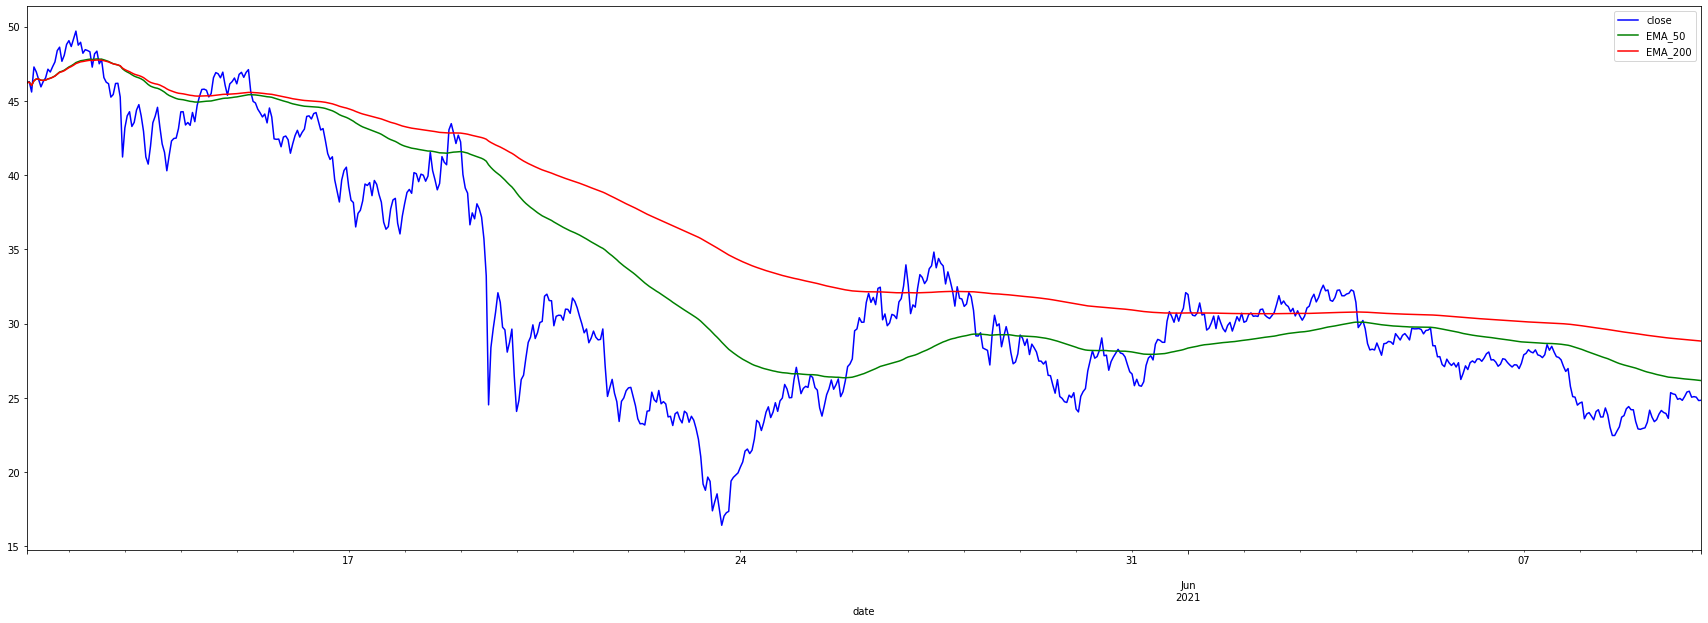

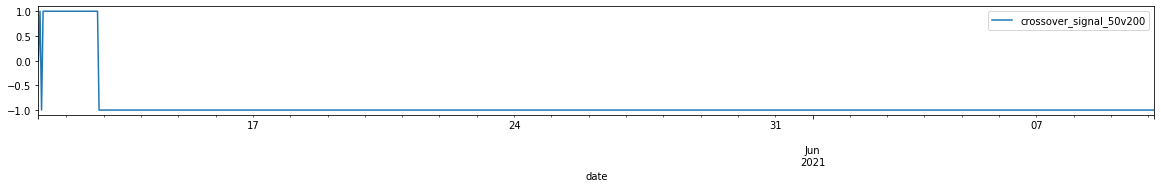

In [14]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200']].plot(figsize=(30,10), color=['b', 'g', 'r', 'm'])
historical_prices_df[['crossover_signal_50v200']].plot(figsize=(20,2))

<AxesSubplot:xlabel='date'>

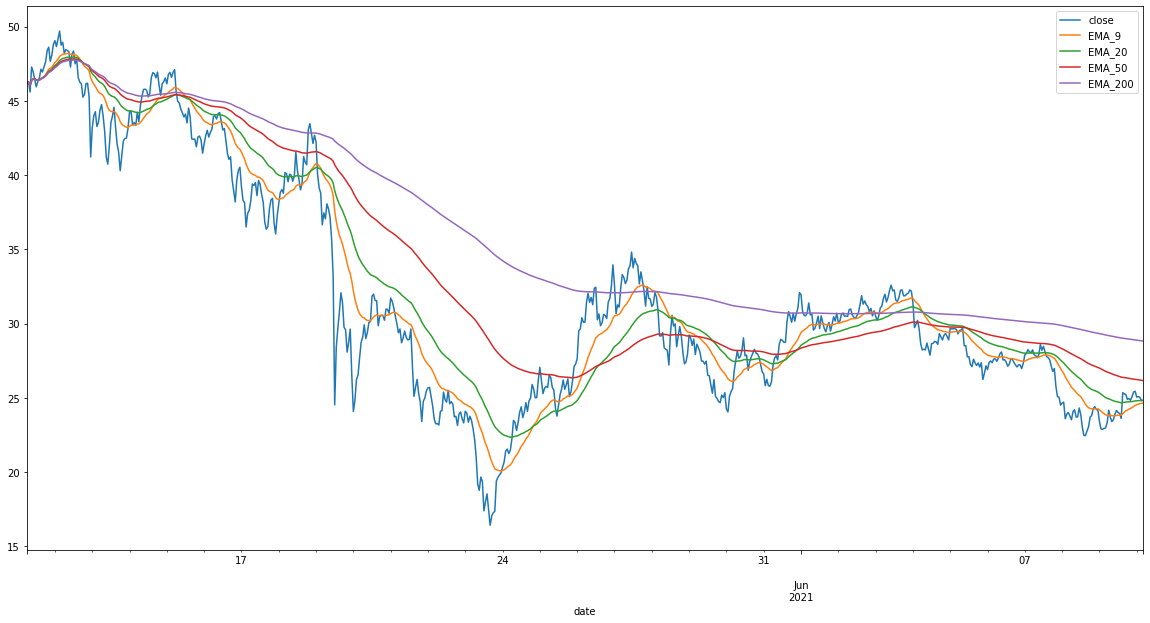

In [15]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [16]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

timestamp      open      high       low     close  \
date                                                                         
2021-05-13 08:00:00  1620892800000  44.03918  44.11004  42.95477  42.95477   
2021-05-13 09:00:00  1620896400000  42.99405  43.10209  40.29654  41.22402   
2021-05-13 10:00:00  1620900000000  41.21522  42.39209  40.65451  40.74371   
2021-05-13 11:00:00  1620903600000  40.49668  42.41006  40.31639  41.95278   
2021-05-13 12:00:00  1620907200000  42.42302  43.52829  42.12820  43.52829   
2021-05-13 13:00:00  1620910800000  43.65489  44.52220  43.10250  43.96705   
2021-05-13 14:00:00  1620914400000  44.33336  44.58647  44.18691  44.56894   
2021-05-13 15:00:00  1620918000000  44.52095  44.52095  43.02242  43.25543   
2021-05-13 16:00:00  1620921600000  43.38585  44.41000  42.00000  42.10000   
2021-05-13 17:00:00  1620925200000  42.46567  42.46567  40.20651  41.53864   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-13 08:00:00   568.164669 2021-05-13 08:00:00     -0.023533  45.167424   
2021-05-13 09:00:00  6354.109347 2021-05-13 09:00:00     -0.040292  44.869691   
2021-05-13 10:00:00  3070.201615 2021-05-13 10:00:00     -0.011651  44.558602   
2021-05-13 11:00:00  2997.247357 2021-05-13 11:00:00      0.029675  44.362378   
2021-05-13 12:00:00  1255.346740 2021-05-13 12:00:00      0.037554  44.299644   
2021-05-13 13:00:00  6481.230812 2021-05-13 13:00:00      0.010080  44.274655   
2021-05-13 14:00:00  3002.935345 2021-05-13 14:00:00      0.013690  44.296743   
2021-05-13 15:00:00  6488.444950 2021-05-13 15:00:00     -0.029471  44.218659   
2021-05-13 16:00:00  2878.822430 2021-05-13 16:00:00     -0.026712  44.059925   
2021-05-13 17:00:00  5042.811469 2021-05-13 17:00:00     -0.013334  43.871176   

                        EMA_20  ...  crossover_long_50v200  \
date                            ...                          
2021-05-13 08:00:00  45.978263  ...                    0.0   
2021-05-13 09:00:00  45.784328  ...                    0.0   
2021-05-13 10:00:00  45.580087  ...                    0.0   
2021-05-13 11:00:00  45.434054  ...                    0.0   
2021-05-13 12:00:00  45.357802  ...                    0.0   
2021-05-13 13:00:00  45.302485  ...                    0.0   
2021-05-13 14:00:00  45.273474  ...                    0.0   
2021-05-13 15:00:00  45.194098  ...                    0.0   
2021-05-13 16:00:00  45.073035  ...                    0.0   
2021-05-13 17:00:00  44.935441  ...                    0.0   

                     crossover_short_50v200  crossover_signal_50v200  \
date                                                                   
2021-05-13 08:00:00                    -1.0                     -1.0   
2021-05-13 09:00:00                    -1.0                     -1.0   
2021-05-13 10:00:00                    -1.0                     -1.0   
2021-05-13 11:00:00                    -1.0                     -1.0   
2021-05-13 12:00:00                    -1.0                     -1.0   
2021-05-13 13:00:00                    -1.0                     -1.0   
2021-05-13 14:00:00                    -1.0                     -1.0   
2021-05-13 15:00:00                    -1.0                     -1.0   
2021-05-13 16:00:00                    -1.0                     -1.0   
2021-05-13 17:00:00                    -1.0                     -1.0   

                     bollinger_mid_band  bollinger_std  bollinger_upper_band  \
date                                                                           
2021-05-13 08:00:00           44.909352       1.656156             46.565508   
2021-05-13 09:00:00           44.595553       1.732279             46.327832   
2021-05-13 10:00:00           44.243431       1.765041             46.008473   
2021-05-13 11:00:00           44.012415       1.746341             45.758756   
2021-05-13 12:00:00      

### Plot Bollinger Bands

Text(0.5, 1.0, 'Bollinger Band Trading Signals')

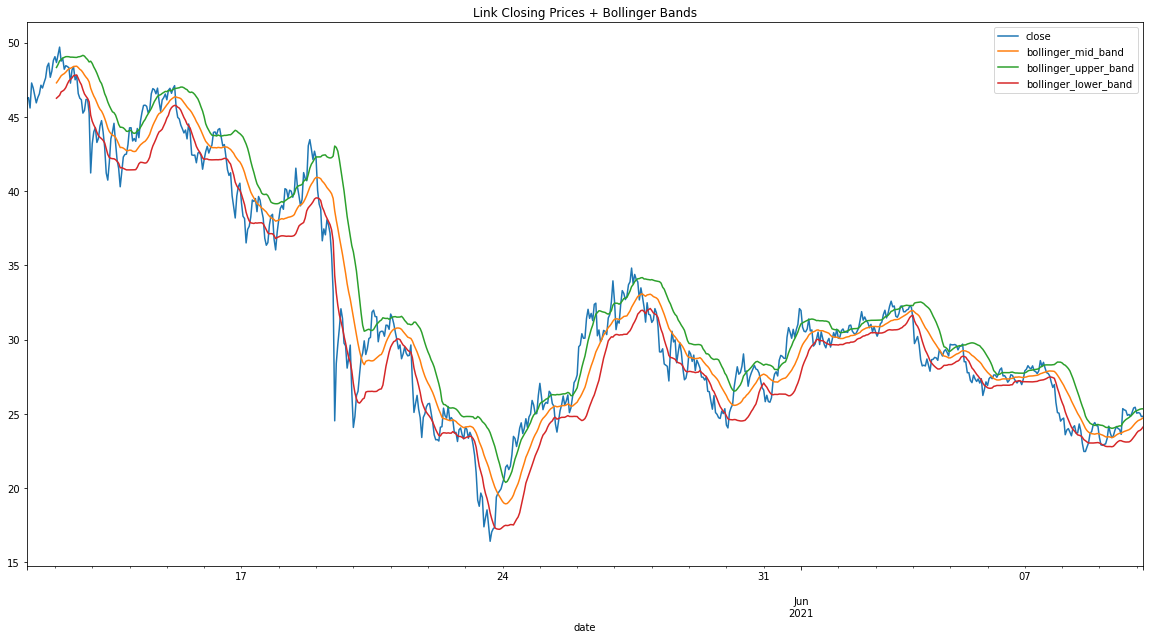

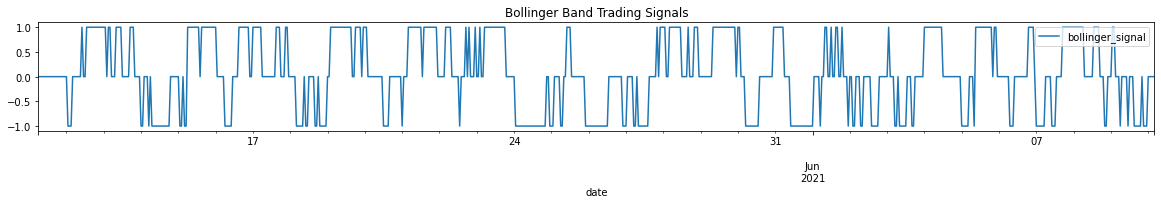

In [17]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
plt.title('Link Closing Prices + Bollinger Bands')
historical_prices_df[['bollinger_signal']].plot(figsize=(20,2))
plt.title('Bollinger Band Trading Signals')

### Build MACD Signals

In [18]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd

historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']

# Construct a conservative SELL signals
historical_prices_df['macd_diff_shift'] = historical_prices_df['macd_diff'].shift(1)
historical_prices_df['macd_diff_gradient'] = ( (historical_prices_df['macd_diff'] - historical_prices_df['macd_diff_shift']) / (historical_prices_df['macd_diff_shift']) )

historical_prices_df['macd_conservative_long_exit'] = np.where(historical_prices_df['macd_diff_gradient'] < 0, -1.0, 0.0)
historical_prices_df['macd_conservative_short_exit'] = np.where(historical_prices_df['macd_diff_gradient'] > 0, 1.0, 0.0)


mac_list = ['close', 'mac_fast_12', 'mac_slow_26', 'macd', 'mac_signal_line_9ema', 'macd_diff', 'macd_long', 'macd_short', 'macd_signal', 'macd_diff_shift', 'macd_diff_gradient', 'macd_conservative_long_exit', 'macd_conservative_short_exit']
historical_prices_df[mac_list].iloc[50:100]

close  mac_fast_12  mac_slow_26      macd  \
date                                                                
2021-05-13 08:00:00  42.95477    44.216373    45.189189 -0.972816   
2021-05-13 09:00:00  41.22402    43.756011    44.895473 -1.139462   
2021-05-13 10:00:00  40.74371    43.292580    44.587935 -1.295355   
2021-05-13 11:00:00  41.95278    43.086457    44.392738 -1.306281   
2021-05-13 12:00:00  43.52829    43.154431    44.328705 -1.174274   
2021-05-13 13:00:00  43.96705    43.279450    44.301916 -1.022466   
2021-05-13 14:00:00  44.56894    43.477833    44.321695 -0.843863   
2021-05-13 15:00:00  43.25543    43.443617    44.242713 -0.799096   
2021-05-13 16:00:00  42.10000    43.236907    44.083993 -0.847087   
2021-05-13 17:00:00  41.53864    42.975635    43.895449 -0.919814   
2021-05-13 18:00:00  40.29654    42.563466    43.628863 -1.065396   
2021-05-13 19:00:00  41.32421    42.372812    43.458148 -1.085336   
2021-05-13 20:00:00  42.30095    42.361756    43.372429 -1.010674   
2021-05-13 21:00:00  42.47000    42.378409    43.305583 -0.927174   
2021-05-13 22:00:00  42.49652    42.396580    43.245652 -0.849072   
2021-05-13 23:00:00  43.14226    42.511300    43.237994 -0.726694   
2021-05-14 00:00:00  44.26324    42.780829    43.313938 -0.533109   
2021-05-14 01:00:00  44.27103    43.010091    43.384833 -0.374743   
2021-05-14 02:00:00  43.38080    43.067123    43.384535 -0.317412   
2021-05-14 03:00:00  43.54596    43.140790    43.396492 -0.255702   
2021-05-14 04:00:00  43.35558    43.173835    43.393462 -0.219627   
2021-05-14 05:00:00  44.22125    43.334976    43.454779 -0.119804   
2021-05-14 06:00:00  43.60051    43.375827    43.465574 -0.089747   
2021-05-14 07:00:00  44.69707    43.579095    43.556796  0.022299   
2021-05-14 08:00:00  45.30000    43.843850    43.685922  0.157928   
2021-05-14 09:00:00  45.77142    44.140399    43.840404  0.299995   
2021-05-14 10:00:00  45.79216    44.394516    43.984978  0.409538   
2021-05-14 11:00:00  45.71715    44.597998    44.113287  0.484711   
2021-05-14 12:00:00  45.27235    44.701745    44.199144  0.502601   
2021-05-14 13:00:00  45.49092    44.823156    44.294831  0.528325   
2021-05-14 14:00:00  46.56203    45.090675    44.462771  0.627904   
2021-05-14 15:00:00  46.90647    45.370028    44.643786  0.726242   
2021-05-14 16:00:00  46.82824    45.594369    44.805598  0.788771   
2021-05-14 17:00:00  46.55745    45.742535    44.935364  0.807171   
2021-05-14 18:00:00  46.93807    45.926463    45.083713  0.842750   
2021-05-14 19:00:00  46.05313    45.945951    45.155522  0.790429   
2021-05-14 20:00:00  45.37960    45.858820    45.172120  0.686700   
2021-05-14 21:00:00  46.14520    45.902878    45.244200  0.658678   
2021-05-14 22:00:00  46.30000    45.963974    45.322407  0.641566   
2021-05-14 23:00:00  46.54095    46.052739    45.412670  0.640070   
2021-05-15 00:00:00  46.15097    46.067852    45.467359  0.600493   
2021-05-15 01:00:00  46.78755    46.178575    45.565151  0.613424   
2021-05-15 02:00:00  46.92574    46.293523    45.665935  0.627588   
2021-05-15 03:00:00  46.58889    46.338964    45.734302  0.604662   
2021-05-15 04:00:00  46.91895    46.428193    45.822054  0.606139   
2021-05-15 05:00:00  47.10698    46.532622    45.917234  0.615388   
2021-05-15 06:00:00  45.60647    46.390137    45.894214  0.495923   
2021-05-15 07:00:00  44.96972    46.171611    45.825733  0.345878   
2021-05-15 08:00:00  44.86096    45.969972    45.754268  0.215704   
2021-05-15 09:00:00  44.44571    45.735471    45.657338  0.078132   

                     mac_signal_line_9ema  macd_diff  macd_long  macd_short  \
date                                                                          
2021-05-13 08:00:00             -0.927835  -0.044981        0.0        -1.0   
2021-05-13 09:00:00             -0.970160  -0.169302        0.0        -1.0   
2021-05-13 10:00:00             -1.035199  -0.260156        0.0        -1.0   
2021-05-13 11:00:00             -1.08941

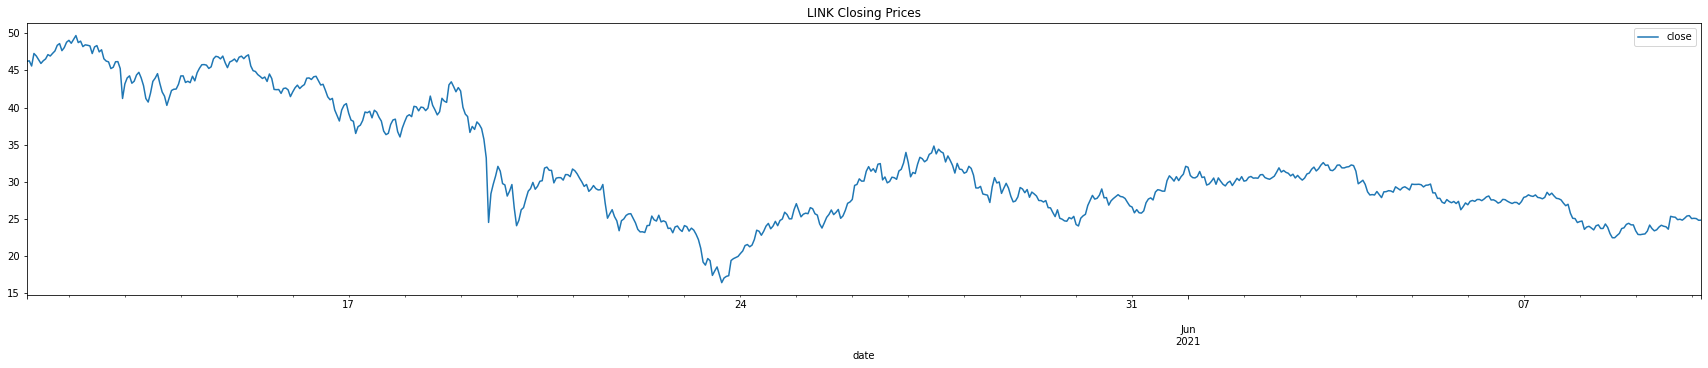

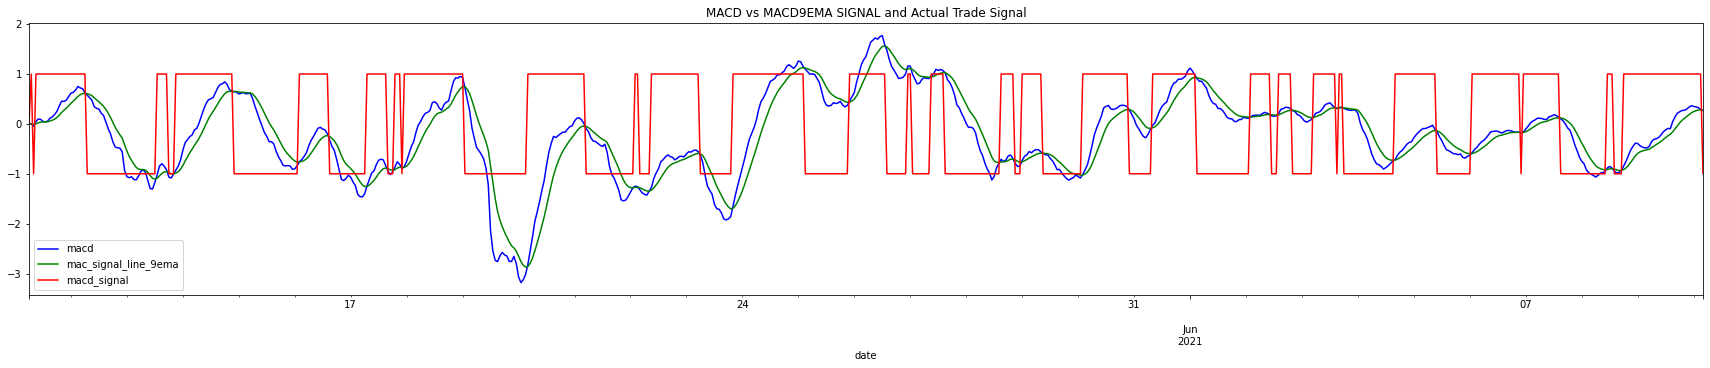

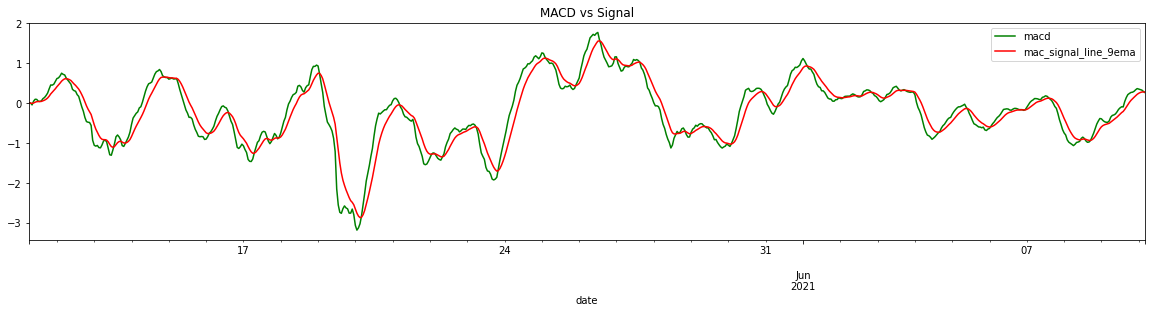

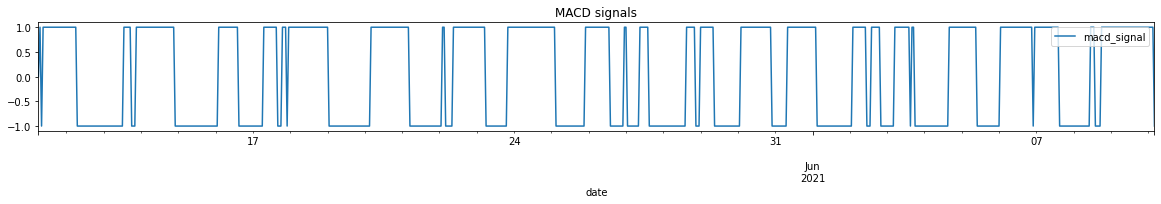

In [19]:
historical_prices_df[['close']].plot(figsize=(30,5))
plt.title('LINK Closing Prices');
historical_prices_df[['macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(30,5), color=['b', 'g', 'r'])
plt.title('MACD vs MACD9EMA SIGNAL and Actual Trade Signal');
historical_prices_df[['macd','mac_signal_line_9ema']].plot(figsize=(20,4), color=['g', 'r'])
plt.title('MACD vs Signal');
historical_prices_df[['macd_signal']].plot(figsize=(20,2))
plt.title('MACD signals');

<AxesSubplot:xlabel='date'>

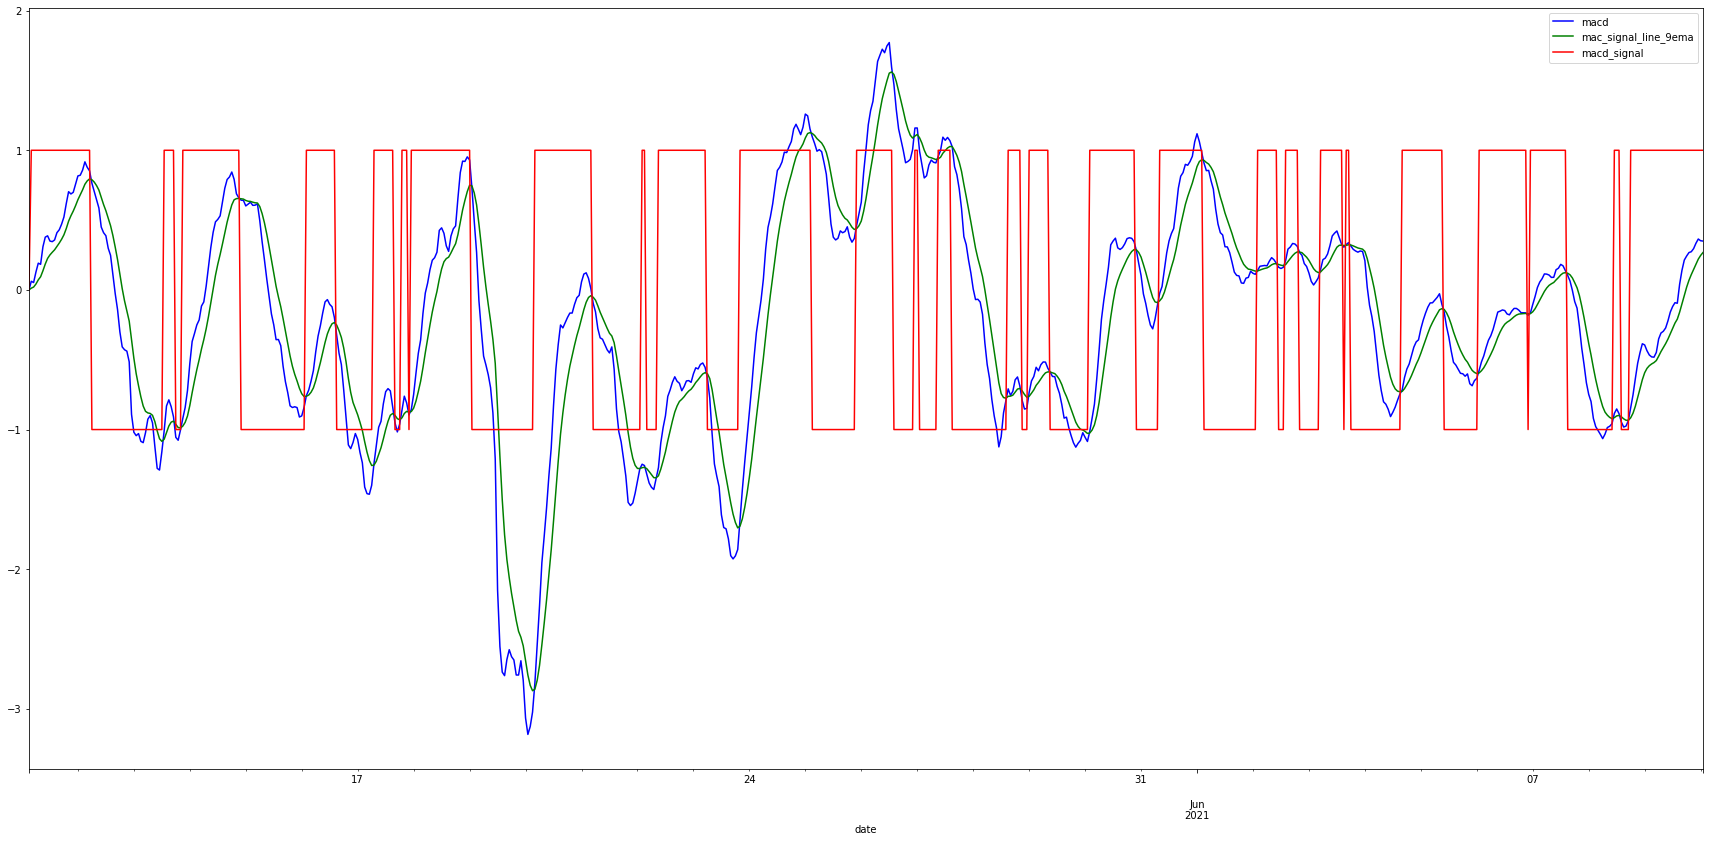

### Build RSI Signals

In [20]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   
2021-05-11 08:00:00  1620720000000  46.32687  46.37596  45.47682  45.60073   
2021-05-11 09:00:00  1620723600000  45.81917  47.33502  45.81917  47.28453   
2021-05-11 10:00:00  1620727200000  47.36035  47.59029  46.95452  46.95452   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  46.223900   
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  46.262812   
2021-05-11 08:00:00  1042.521050 2021-05-11 08:00:00     -0.015078  46.024920   
2021-05-11 09:00:00  1869.926187 2021-05-11 09:00:00      0.036925  46.377079   
2021-05-11 10:00:00  2039.965108 2021-05-11 10:00:00     -0.006979  46.511004   

                        EMA_20  ...  macd_diff_gradient  \
date                            ...                       
2021-05-11 06:00:00  46.223900  ...                 NaN   
2021-05-11 07:00:00  46.262019  ...                 inf   
2021-05-11 08:00:00  46.033907  ...           -8.743506   
2021-05-11 09:00:00  46.363000  ...           -2.248294   
2021-05-11 10:00:00  46.489643  ...            0.620206   

                     macd_conservative_long_exit  \
date                                               
2021-05-11 06:00:00                          0.0   
2021-05-11 07:00:00                          0.0   
2021-05-11 08:00:00                         -1.0   
2021-05-11 09:00:00                         -1.0   
2021-05-11 10:00:00                          0.0   

                     macd_conservative_short_exit   change     gain     loss  \
date                                                                           
2021-05-11 06:00:00                           0.0      NaN      NaN      NaN   
2021-05-11 07:00:00                           1.0  0.07494  0.07494  0.00000   
2021-05-11 08:00:00                           0.0 -0.69811  0.00000  0.69811   
2021-05-11 09:00:00                           0.0  1.68380  1.68380  0.00000   
2021-05-11 10:00:00                           1.0 -0.33001  0.00000  0.33001   

                     avg_gain  avg_loss  rs  rsi_14  
date                                                 
2021-05-11 06:00:00       NaN       NaN NaN     NaN  
2021-05-11 07:00:00       NaN       NaN NaN     NaN  
2021-05-11 08:00:00       NaN       NaN NaN     NaN  
2021-05-11 09:00:00       NaN       NaN NaN     NaN  
2021-05-11 10:00:00       NaN       NaN NaN     NaN  

[5 rows x 44 columns]

In [21]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold'] # NEED TO ADD 'rsi_signal',

historical_prices_df[rsi_list].iloc[50:100]
# historical_prices_df.head()

close  daily_return        rs     rsi_14  \
date                                                               
2021-05-13 08:00:00  42.95477     -0.023533  0.635240  38.846880   
2021-05-13 09:00:00  41.22402     -0.040292  0.496295  33.168249   
2021-05-13 10:00:00  40.74371     -0.011651  0.465843  31.779859   
2021-05-13 11:00:00  41.95278      0.029675  0.632180  38.732266   
2021-05-13 12:00:00  43.52829      0.037554  0.865604  46.398065   
2021-05-13 13:00:00  43.96705      0.010080  0.935610  48.336710   
2021-05-13 14:00:00  44.56894      0.013690  1.039032  50.957116   
2021-05-13 15:00:00  43.25543     -0.029471  0.835867  45.529821   
2021-05-13 16:00:00  42.10000     -0.026712  0.705235  41.357064   
2021-05-13 17:00:00  41.53864     -0.013334  0.651927  39.464642   
2021-05-13 18:00:00  40.29654     -0.029902  0.552425  35.584651   
2021-05-13 19:00:00  41.32421      0.025503  0.688418  40.772944   
2021-05-13 20:00:00  42.30095      0.023636  0.827613  45.283820   
2021-05-13 21:00:00  42.47000      0.003996  0.853557  46.049691   
2021-05-13 22:00:00  42.49652      0.000624  0.857941  46.176968   
2021-05-13 23:00:00  43.14226      0.015195  0.972877  49.312605   
2021-05-14 00:00:00  44.26324      0.025983  1.187750  54.290948   
2021-05-14 01:00:00  44.27103      0.000176  1.189359  54.324521   
2021-05-14 02:00:00  43.38080     -0.020109  0.992866  49.821003   
2021-05-14 03:00:00  43.54596      0.003807  1.025874  50.638584   
2021-05-14 04:00:00  43.35558     -0.004372  0.985493  49.634673   
2021-05-14 05:00:00  44.22125      0.019967  1.178244  54.091470   
2021-05-14 06:00:00  43.60051     -0.014037  1.025589  50.631637   
2021-05-14 07:00:00  44.69707      0.025150  1.272071  55.987283   
2021-05-14 08:00:00  45.30000      0.013489  1.418021  58.643860   
2021-05-14 09:00:00  45.77142      0.010407  1.540914  60.644090   
2021-05-14 10:00:00  45.79216      0.000453  1.546737  60.734069   
2021-05-14 11:00:00  45.71715     -0.001638  1.512437  60.198015   
2021-05-14 12:00:00  45.27235     -0.009729  1.324826  56.986020   
2021-05-14 13:00:00  45.49092      0.004828  1.390469  58.167210   
2021-05-14 14:00:00  46.56203      0.023546  1.736904  63.462368   
2021-05-14 15:00:00  46.90647      0.007397  1.856878  64.996754   
2021-05-14 16:00:00  46.82824     -0.001668  1.803942  64.335920   
2021-05-14 17:00:00  46.55745     -0.005783  1.630651  61.986600   
2021-05-14 18:00:00  46.93807      0.008175  1.776062  63.977747   
2021-05-14 19:00:00  46.05313     -0.018853  1.302017  56.559836   
2021-05-14 20:00:00  45.37960     -0.014625  1.068304  51.651199   
2021-05-14 21:00:00  46.14520      0.016871  1.288037  56.294420   
2021-05-14 22:00:00  46.30000      0.003355  1.335884  57.189653   
2021-05-14 23:00:00  46.54095      0.005204  1.416087  58.610761   
2021-05-15 00:00:00  46.15097     -0.008379  1.242405  55.405025   
2021-05-15 01:00:00  46.78755      0.013793  1.458011  59.316693   
2021-05-15 02:00:00  46.92574      0.002954  1.508415  60.134188   
2021-05-15 03:00:00  46.58889     -0.007178  1.332150  57.121112   
2021-05-15 04:00:00  46.91895      0.007085  1.455457  59.274377   
2021-05-15 05:00:00  47.10698      0.004008  1.531106  60.491578   
2021-05-15 06:00:00  45.60647     -0.031853  0.927869  48.129251   
2021-05-15 07:00:00  44.96972     -0.013962  0.786295  44.018205   
2021-05-15 08:00:00  44.86096     -0.002419  0.764829  43.337294   
2021-05-15 09:00:00  44.44571     -0.009256  0.687642  40.745713   

                     rsi_overbought  rsi_oversold  
date                                               
2021-05-13 08:00:00             0.0           0.0  
2021-05-13 09:00:00             0.0           0.0  
2021-05-13 10:00:00             0.0           0.0  
2021-05-13 11:00:00             0.0           0.0  
2021-05-13 12:00:00             0.0           0.0  
2021-05-13 13:00:00             0.0           0.0  
2021-05-13 14:00:00             0.0           0.0  
2021-05-13 15:00:00

In [22]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 15

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_periods', 'rsi_oversold_preceeding_periods'] # NEED TO ADD 'rsi_signal',


historical_prices_df['rsi_oversold_preceeding_periods'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_periods'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_periods'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_periods'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_periods',	'rsi_oversold_preceeding_periods',	'rsi_long',	'rsi_short',	'rsi_signal']
# display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[195:230])

rs     rsi_14  rsi_overbought  rsi_oversold  \
date                                                                     
2021-05-19 09:00:00  0.656952  39.648221             0.0           0.0   
2021-05-19 10:00:00  0.534525  34.833264             0.0           0.0   
2021-05-19 11:00:00  0.397473  28.442281             0.0           1.0   
2021-05-19 12:00:00  0.202964  16.871965             0.0           1.0   
2021-05-19 13:00:00  0.437065  30.413725             0.0           0.0   
2021-05-19 14:00:00  0.521288  34.266224             0.0           0.0   
2021-05-19 15:00:00  0.598509  37.441703             0.0           0.0   
2021-05-19 16:00:00  0.697524  41.090656             0.0           0.0   
2021-05-19 17:00:00  0.662875  39.863182             0.0           0.0   
2021-05-19 18:00:00  0.581263  36.759399             0.0           0.0   
2021-05-19 19:00:00  0.573191  36.434934             0.0           0.0   
2021-05-19 20:00:00  0.509269  33.742770             0.0           0.0   
2021-05-19 21:00:00  0.562380  35.995081             0.0           0.0   
2021-05-19 22:00:00  0.638953  38.985443             0.0           0.0   
2021-05-19 23:00:00  0.494764  33.099824             0.0           0.0   
2021-05-20 00:00:00  0.416873  29.422054             0.0           1.0   
2021-05-20 01:00:00  0.468565  31.906327             0.0           0.0   
2021-05-20 02:00:00  0.575542  36.529795             0.0           0.0   
2021-05-20 03:00:00  0.599368  37.475312             0.0           0.0   
2021-05-20 04:00:00  0.700945  41.209159             0.0           0.0   
2021-05-20 05:00:00  0.800583  44.462426             0.0           0.0   
2021-05-20 06:00:00  0.836727  45.555334             0.0           0.0   
2021-05-20 07:00:00  0.927709  48.124952             0.0           0.0   
2021-05-20 08:00:00  0.836632  45.552512             0.0           0.0   
2021-05-20 09:00:00  0.882491  46.878908             0.0           0.0   
2021-05-20 10:00:00  0.966255  49.141898             0.0           0.0   
2021-05-20 11:00:00  0.975979  49.392165             0.0           0.0   
2021-05-20 12:00:00  1.219736  54.949601             0.0           0.0   
2021-05-20 13:00:00  1.240772  55.372530             0.0           0.0   
2021-05-20 14:00:00  1.158025  53.661343             0.0           0.0   
2021-05-20 15:00:00  1.155268  53.602058             0.0           0.0   
2021-05-20 16:00:00  0.887114  47.009026             0.0           0.0   
2021-05-20 17:00:00  0.981823  49.541400             0.0           0.0   
2021-05-20 18:00:00  0.993014  49.824737             0.0           0.0   
2021-05-20 19:00:00  0.991690  49.791392             0.0           0.0   

                     rsi_overbought_preceeding_periods  \
date                                                     
2021-05-19 09:00:00                                0.0   
2021-05-19 10:00:00                                0.0   
2021-05-19 11:00:00                                0.0   
2021-05-19 12:00:00                                0.0   
2021-05-19 13:00:00                                0.0   
2021-05-19 14:00:00                                0.0   
2021-05-19 15:00:00                                0.0   
2021-05-19 16:00:00                                0.0   
2021-05-19 17:00:00                                0.0   
2021-05-19 18:00:00                                0.0   
2021-05-19 19:00:00                                0.0   
2021-05-19 20:00:00                                0.0   
2021-05-19 21:00:00                                0.0   
2021-05-19 22:00:00                                0.0   
2021-05-19 23:00:00                                0.0   
2021-05-20 00:00:00                                0.0   
2021-05-20 01:00:00                                0.0   
2021-05-20 02:00:00                                0.0   
2021-05-20 03:00:00                                0.0   
2021-05-20 04:00:00                                0.0   
2021-05-20 0

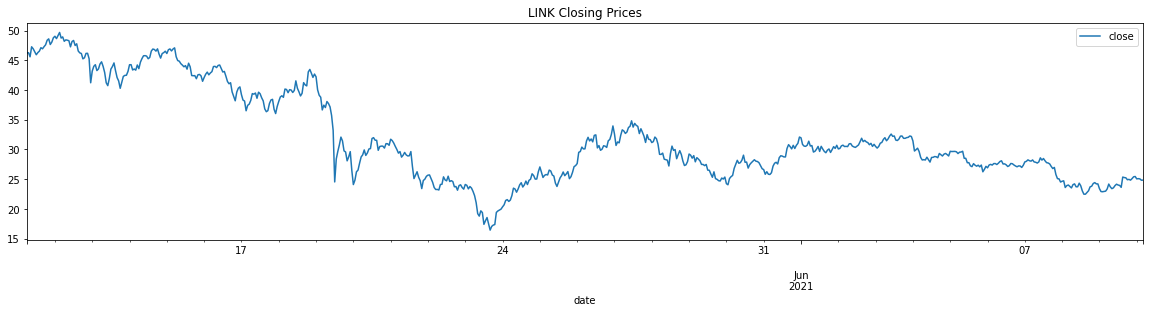

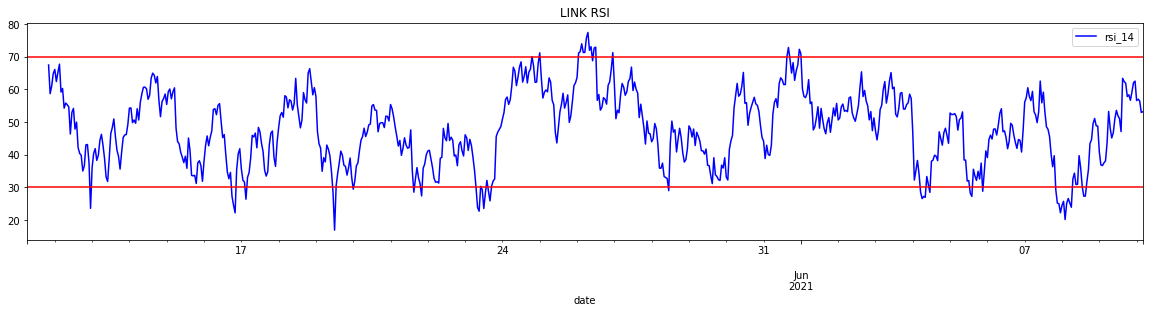

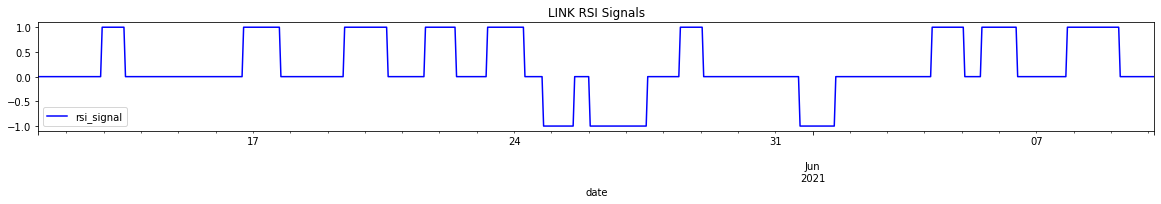

In [23]:
historical_prices_df[['close']].plot(figsize=(20,4))
plt.title('LINK Closing Prices');
historical_prices_df[['rsi_14']].plot(figsize=(20,4), color=['b', 'b'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')
plt.title('LINK RSI');
historical_prices_df[['rsi_signal']].plot(figsize=(20,2), color=['b'])
plt.title('LINK RSI Signals');

In [24]:
historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   
2021-05-11 08:00:00  1620720000000  46.32687  46.37596  45.47682  45.60073   
2021-05-11 09:00:00  1620723600000  45.81917  47.33502  45.81917  47.28453   
2021-05-11 10:00:00  1620727200000  47.36035  47.59029  46.95452  46.95452   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  46.223900   
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  46.262812   
2021-05-11 08:00:00  1042.521050 2021-05-11 08:00:00     -0.015078  46.024920   
2021-05-11 09:00:00  1869.926187 2021-05-11 09:00:00      0.036925  46.377079   
2021-05-11 10:00:00  2039.965108 2021-05-11 10:00:00     -0.006979  46.511004   

                        EMA_20  ...  avg_loss  rs  rsi_14  rsi_oversold  \
date                            ...                                       
2021-05-11 06:00:00  46.223900  ...       NaN NaN     NaN           0.0   
2021-05-11 07:00:00  46.262019  ...       NaN NaN     NaN           0.0   
2021-05-11 08:00:00  46.033907  ...       NaN NaN     NaN           0.0   
2021-05-11 09:00:00  46.363000  ...       NaN NaN     NaN           0.0   
2021-05-11 10:00:00  46.489643  ...       NaN NaN     NaN           0.0   

                     rsi_overbought  rsi_oversold_preceeding_periods  \
date                                                                   
2021-05-11 06:00:00             0.0                              0.0   
2021-05-11 07:00:00             0.0                              0.0   
2021-05-11 08:00:00             0.0                              0.0   
2021-05-11 09:00:00             0.0                              0.0   
2021-05-11 10:00:00             0.0                              0.0   

                     rsi_overbought_preceeding_periods  rsi_short  rsi_long  \
date                                                                          
2021-05-11 06:00:00                                0.0        0.0       0.0   
2021-05-11 07:00:00                                0.0        0.0       0.0   
2021-05-11 08:00:00                                0.0        0.0       0.0   
2021-05-11 09:00:00                                0.0        0.0       0.0   
2021-05-11 10:00:00                                0.0        0.0       0.0   

                     rsi_signal  
date                             
2021-05-11 06:00:00         0.0  
2021-05-11 07:00:00         0.0  
2021-05-11 08:00:00         0.0  
2021-05-11 09:00:00         0.0  
2021-05-11 10:00:00         0.0  

[5 rows x 51 columns]

# 2. MACHINE LEARNING COMPONENT

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [25]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [26]:
# Set x variable list of features
st1_x_var_list = ['close', 'crossover_signal_50v200', 'bollinger_signal', 'bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal']
st3_x_var_list = ['close', 'crossover_signal_50v200', 'macd_signal']
st4_x_var_list = ['close', 'crossover_signal_50v200', 'crossover_signal_9v20']

## Strategy 1 - EMA50V200 + Bollinger

In [27]:
historical_prices_df[st1_x_var_list]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-11 06:00:00  46.22390                      0.0               0.0   
2021-05-11 07:00:00  46.29884                      1.0               0.0   
2021-05-11 08:00:00  45.60073                     -1.0               0.0   
2021-05-11 09:00:00  47.28453                      1.0               0.0   
2021-05-11 10:00:00  46.95452                      1.0               0.0   
...                       ...                      ...               ...   
2021-06-10 00:00:00  25.05017                     -1.0               0.0   
2021-06-10 01:00:00  25.08719                     -1.0               0.0   
2021-06-10 02:00:00  25.05033                     -1.0               0.0   
2021-06-10 03:00:00  24.82237                     -1.0               0.0   
2021-06-10 04:00:00  24.84010                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-05-11 06:00:00                 NaN                   NaN   
2021-05-11 07:00:00                 NaN                   NaN   
2021-05-11 08:00:00                 NaN                   NaN   
2021-05-11 09:00:00                 NaN                   NaN   
2021-05-11 10:00:00                 NaN                   NaN   
...                                 ...                   ...   
2021-06-10 00:00:00           24.469282             25.217552   
2021-06-10 01:00:00           24.555550             25.268024   
2021-06-10 02:00:00           24.599389             25.314092   
2021-06-10 03:00:00           24.655209             25.339408   
2021-06-10 04:00:00           24.727118             25.345028   

                     bollinger_lower_band  
date                                       
2021-05-11 06:00:00                   NaN  
2021-05-11 07:00:00                   NaN  
2021-05-11 08:00:00                   NaN  
2021-05-11 09:00:00                   NaN  
2021-05-11 10:00:00                   NaN  
...                                   ...  
2021-06-10 00:00:00             23.721011  
2021-06-10 01:00:00             23.843075  
2021-06-10 02:00:00             23.884687  
2021-06-10 03:00:00             23.971010  
2021-06-10 04:00:00             24.109209  

[719 rows x 6 columns]

In [28]:
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]


# shift the bollinger signal down, to help find the OPTIMAL Buy/sell time 
strategy_1['bollinger_shift'] = strategy_1['bollinger_signal'].shift(1)


# Define long and short position conditions
strategy_1['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_1.iloc[509:528]
strategy_1.tail(20)

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-06-09 09:00:00  23.53781                     -1.0               0.0   
2021-06-09 10:00:00  23.90753                     -1.0               0.0   
2021-06-09 11:00:00  24.15363                     -1.0              -1.0   
2021-06-09 12:00:00  24.01709                     -1.0               0.0   
2021-06-09 13:00:00  23.94934                     -1.0               0.0   
2021-06-09 14:00:00  23.62249                     -1.0               0.0   
2021-06-09 15:00:00  25.35434                     -1.0              -1.0   
2021-06-09 16:00:00  25.27045                     -1.0              -1.0   
2021-06-09 17:00:00  25.22922                     -1.0              -1.0   
2021-06-09 18:00:00  24.90510                     -1.0              -1.0   
2021-06-09 19:00:00  24.96471                     -1.0              -1.0   
2021-06-09 20:00:00  24.83702                     -1.0               0.0   
2021-06-09 21:00:00  25.09464                     -1.0              -1.0   
2021-06-09 22:00:00  25.39884                     -1.0              -1.0   
2021-06-09 23:00:00  25.45000                     -1.0              -1.0   
2021-06-10 00:00:00  25.05017                     -1.0               0.0   
2021-06-10 01:00:00  25.08719                     -1.0               0.0   
2021-06-10 02:00:00  25.05033                     -1.0               0.0   
2021-06-10 03:00:00  24.82237                     -1.0               0.0   
2021-06-10 04:00:00  24.84010                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-06-09 09:00:00           23.434488             24.048446   
2021-06-09 10:00:00           23.506380             24.084557   
2021-06-09 11:00:00           23.590598             24.131211   
2021-06-09 12:00:00           23.652834             24.165203   
2021-06-09 13:00:00           23.697785             24.193683   
2021-06-09 14:00:00           23.693579             24.189755   
2021-06-09 15:00:00           23.770850             24.390825   
2021-06-09 16:00:00           23.821039             24.518992   
2021-06-09 17:00:00           23.861629             24.617309   
2021-06-09 18:00:00           23.896476             24.684359   
2021-06-09 19:00:00           23.934680             24.755908   
2021-06-09 20:00:00           24.005891             24.841113   
2021-06-09 21:00:00           24.114922             24.942403   
2021-06-09 22:00:00           24.240654             25.062313   
2021-06-09 23:00:00           24.365997             25.170331   
2021-06-10 00:00:00           24.469282             25.217552   
2021-06-10 01:00:00           24.555550             25.268024   
2021-06-10 02:00:00           24.599389             25.314092   
2021-06-10 03:00:00           24.655209             25.339408   
2021-06-10 04:00:00           24.727118             25.345028   

                     bollinger_lower_band  bollinger_shift bull_or_bear  
date                                                                     
2021-06-09 09:00:00             22.820530              0.0         Bear  
2021-06-09 10:00:00             22.928204              0.0         Bear  
2021-06-09 11:00:00             23.049985              0.0         Bear  
2021-06-09 12:00:00             23.140465             -1.0         Bear  
2021-06-09 13:00:00             23.201888              0.0         Bear  
2021-06-09 14:00:00             23.197403              0.0         Bear  
2021-06-09 15:00:00             23.150874              0.0         Bear  
2021-06-09 16:00:00             23.123086             -1.0         Bear  
2021-06-09 17:00:00             23.105950             -1.0         Bear  
2021-06-09 18:00:00             23.108593             -1.0         Bear  
2021-06-09 19:00:00             

In [29]:
# IF BULL, BOLLINGER == 0, BOLLINGER_SHIFT == 1,

## Program the Conditional Logic for the Trading Strategy

In [30]:
# EMA50v200 - BOLL - BOLLSHIFT
# -1 - [  1] -  [1] - HOLD NO POSITION
# -1 - [  1] -  [0] - HOLD NO POSITION / CLOSE SHORT POSITION
# -1 - [  1] -  [-1] - CLOSE SHORT POSITION
# -1 - [  0] -  [1] - HOLD NO POSITION
# -1 - [  0] -  [0] - HOLD POSITION
# -1 - [  0] -  [-1] - HOLD SHORT POSITION
# -1 - [  -1] - [ 1] - CLOSE LONG, ENTER SHORT
# -1 - [  -1] - [ 0] - ENTERSHORT
# -1 - [  -1] - [ -1] - HOLDSHORT
# 1 - [  1] -  [1] - HOLD LONG
# 1 - [  1] -  [0] - ENTER LONG
# 1 - [  1] -  [-1] - CLOSE SHORT, ENTER LONG
# 1 - [  0] -  [1] - HOLD LONG (Do nothing)
# 1 - [  0] -  [0] - HOLD POSITION
# 1 - [  0] -  [-1] - HOLD POSITION
# 1 - [  -1] - [ 1] - CLOSE LONG
# 1 - [  -1] - [ 0] - HOLD POSITION / CLOSE LONG 
# 1 - [  -1] - [ -1] - HOLD NO POSITION

In [31]:
st1_position_code = 0
st1_positions = []

for index, row in strategy_1.iterrows():

# EMA:BOLL:BOLLSHIFT = -1 - [  1] -  [0] - NO POSITION / CLOSE SHORT POSITION
    if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] == 0):
        st1_position_code = 0
        st1_positions.append(st1_position_code)

# EMA:BOLL:BOLLSHIFT = 1 - [  -1] - [ 0] - NO POSITION / CLOSE LONG 
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == 0):
        st1_position_code = 0
        st1_positions.append(st1_position_code)

# EMA:BOLL:BOLLSHIFT = -1 - [  1] -  [-1] - CLOSE SHORT POSITION
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] == -1):
        st1_position_code = 0
        st1_positions.append(st1_position_code)

# NOT NEEDED DUE TO CODE BELOW
# # EMA:BOLL:BOLLSHIFT = -1 - [  -1] - [ 1] - CLOSE LONG, ENTER SHORT 
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == 1):
        st1_position_code = -1
        st1_positions.append(st1_position_code)

# EMA:BOLL:BOLLSHIFT = -1 - [  -1] - [ 0] - ENTERSHORT
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == 0):
        st1_position_code = -1
        st1_positions.append(st1_position_code)

# EMA:BOLL:BOLLSHIFT = 1 - [  1] -  [0] - ENTER LONG
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] == 0):
        st1_position_code = 1
        st1_positions.append(st1_position_code)

# NOT NEEDED DUE TO CODE ABOVE
# EMA:BOLL:BOLLSHIFT = 1 - [  1] -  [-1] - CLOSE SHORT, ENTER LONG
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] == -1):
        st1_position_code = 1
        st1_positions.append(st1_position_code)


# EMA:BOLL:BOLLSHIFT = 1 - [  -1] - [ 1] - CLOSE LONG

# else
    # EMA:BOLL:BOLLSHIFT = -1 - [  1] -  [1] - HOLD NO POSITION
    # EMA:BOLL:BOLLSHIFT = -1 - [  0] -  [1] - HOLD NO POSITION
    # EMA:BOLL:BOLLSHIFT = -1 - [  0] -  [0] - HOLD POSITION
    # EMA:BOLL:BOLLSHIFT = -1 - [  -1] - [ -1] - HOLDSHORT
    # EMA:BOLL:BOLLSHIFT = -1 - [  0] -  [-1] - HOLD SHORT POSITION
    # EMA:BOLL:BOLLSHIFT = 1 - [  1] -  [1] - HOLD LONG
    # EMA:BOLL:BOLLSHIFT = 1 - [  0] -  [1] - HOLD LONG (Do nothing)
    # EMA:BOLL:BOLLSHIFT = 1 - [  0] -  [0] - HOLD POSITION
    # EMA:BOLL:BOLLSHIFT = 1 - [  0] -  [-1] - HOLD POSITION
    # EMA:BOLL:BOLLSHIFT = 1 - [  -1] - [ -1] - HOLD NO POSITION
    else:
        st1_position_code = st1_position_code
        st1_positions.append(st1_position_code)

    


# Double check the dataframes have the same row lengths
display(len(st1_positions))
display(strategy_1.shape)
display(historical_prices_df.shape)

719

(719, 8)

(719, 51)

In [32]:
# st1_position_code = 0
# st1_positions = []

# for index, row in strategy_1.iterrows():


#     # BUY SIGNALS, ONLY ENTERING TRADE WHEN PRICE REENTERS FAIR TRADING ZONE
    
#     # IF BEAR + BOLL (WAS JUST) == -1, EXIT SHORT (BUY OUT)
#     if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
#         st1_position_code = -1
#         st1_positions.append(st1_position_code)
    
    
#     # ELIF BULL + BOLL == 1 BUY
#     elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
#         st1_position_code = 1
#         st1_positions.append(st1_position_code)  


#     # EXIT SIGNALS. LESS CONDITIONS. SELL THE SECOND TRADING CONDITIONS AREN'T FAVOURABLE


#     # ELIF BEAR + BOLL == 1, EXIT SHORT / NO POSITION
#     elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] != 1):
#         st1_position_code = 0
#         st1_positions.append(st1_position_code)
    
    
    
#     # ELIF BULL + BOLL == -1, EXIT LONG / NO POSITION
#     elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == -1):
#         st1_position_code = 0
#         st1_positions.append(st1_position_code) 

    
#     # ELSE : O / NA
#     else:
#         st1_position_code = st1_position_code
#         st1_positions.append(st1_position_code)
#         # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")

# # Double check the dataframes have the same row lengths
# display(len(st1_positions))
# display(strategy_1.shape)
# display(historical_prices_df.shape)

In [33]:
strategy_1['boll_ema50200_position'] = st1_positions
historical_prices_df['st1_boll_ema50200_position'] = st1_positions
# strategy_1[130:170]
strategy_1[695:830]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-06-09 05:00:00  23.36183                     -1.0               0.0   
2021-06-09 06:00:00  24.17353                     -1.0              -1.0   
2021-06-09 07:00:00  23.70598                     -1.0               0.0   
2021-06-09 08:00:00  23.40191                     -1.0               0.0   
2021-06-09 09:00:00  23.53781                     -1.0               0.0   
2021-06-09 10:00:00  23.90753                     -1.0               0.0   
2021-06-09 11:00:00  24.15363                     -1.0              -1.0   
2021-06-09 12:00:00  24.01709                     -1.0               0.0   
2021-06-09 13:00:00  23.94934                     -1.0               0.0   
2021-06-09 14:00:00  23.62249                     -1.0               0.0   
2021-06-09 15:00:00  25.35434                     -1.0              -1.0   
2021-06-09 16:00:00  25.27045                     -1.0              -1.0   
2021-06-09 17:00:00  25.22922                     -1.0              -1.0   
2021-06-09 18:00:00  24.90510                     -1.0              -1.0   
2021-06-09 19:00:00  24.96471                     -1.0              -1.0   
2021-06-09 20:00:00  24.83702                     -1.0               0.0   
2021-06-09 21:00:00  25.09464                     -1.0              -1.0   
2021-06-09 22:00:00  25.39884                     -1.0              -1.0   
2021-06-09 23:00:00  25.45000                     -1.0              -1.0   
2021-06-10 00:00:00  25.05017                     -1.0               0.0   
2021-06-10 01:00:00  25.08719                     -1.0               0.0   
2021-06-10 02:00:00  25.05033                     -1.0               0.0   
2021-06-10 03:00:00  24.82237                     -1.0               0.0   
2021-06-10 04:00:00  24.84010                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-06-09 05:00:00           23.440325             24.079522   
2021-06-09 06:00:00           23.463011             24.120440   
2021-06-09 07:00:00           23.432127             24.060882   
2021-06-09 08:00:00           23.408669             24.028879   
2021-06-09 09:00:00           23.434488             24.048446   
2021-06-09 10:00:00           23.506380             24.084557   
2021-06-09 11:00:00           23.590598             24.131211   
2021-06-09 12:00:00           23.652834             24.165203   
2021-06-09 13:00:00           23.697785             24.193683   
2021-06-09 14:00:00           23.693579             24.189755   
2021-06-09 15:00:00           23.770850             24.390825   
2021-06-09 16:00:00           23.821039             24.518992   
2021-06-09 17:00:00           23.861629             24.617309   
2021-06-09 18:00:00           23.896476             24.684359   
2021-06-09 19:00:00           23.934680             24.755908   
2021-06-09 20:00:00           24.005891             24.841113   
2021-06-09 21:00:00           24.114922             24.942403   
2021-06-09 22:00:00           24.240654             25.062313   
2021-06-09 23:00:00           24.365997             25.170331   
2021-06-10 00:00:00           24.469282             25.217552   
2021-06-10 01:00:00           24.555550             25.268024   
2021-06-10 02:00:00           24.599389             25.314092   
2021-06-10 03:00:00           24.655209             25.339408   
2021-06-10 04:00:00           24.727118             25.345028   

                     bollinger_lower_band  bollinger_shift bull_or_bear  \
date                                                                      
2021-06-09 05:00:00             22.801128              0.0         Bear   
2021-06-09 06:00:00             22.805582              0.0         Bear   
2021-06-09 07:00:00             22.803373             -1

In [34]:
strategy_1['boll_ema50200_position_shift'] = strategy_1['boll_ema50200_position'].shift(1)
strategy_1[50:100]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-13 08:00:00  42.95477                     -1.0               1.0   
2021-05-13 09:00:00  41.22402                     -1.0               1.0   
2021-05-13 10:00:00  40.74371                     -1.0               1.0   
2021-05-13 11:00:00  41.95278                     -1.0               1.0   
2021-05-13 12:00:00  43.52829                     -1.0               0.0   
2021-05-13 13:00:00  43.96705                     -1.0               0.0   
2021-05-13 14:00:00  44.56894                     -1.0               0.0   
2021-05-13 15:00:00  43.25543                     -1.0               0.0   
2021-05-13 16:00:00  42.10000                     -1.0               0.0   
2021-05-13 17:00:00  41.53864                     -1.0               1.0   
2021-05-13 18:00:00  40.29654                     -1.0               1.0   
2021-05-13 19:00:00  41.32421                     -1.0               1.0   
2021-05-13 20:00:00  42.30095                     -1.0               0.0   
2021-05-13 21:00:00  42.47000                     -1.0               0.0   
2021-05-13 22:00:00  42.49652                     -1.0               0.0   
2021-05-13 23:00:00  43.14226                     -1.0               0.0   
2021-05-14 00:00:00  44.26324                     -1.0              -1.0   
2021-05-14 01:00:00  44.27103                     -1.0              -1.0   
2021-05-14 02:00:00  43.38080                     -1.0               0.0   
2021-05-14 03:00:00  43.54596                     -1.0               0.0   
2021-05-14 04:00:00  43.35558                     -1.0               0.0   
2021-05-14 05:00:00  44.22125                     -1.0              -1.0   
2021-05-14 06:00:00  43.60051                     -1.0               0.0   
2021-05-14 07:00:00  44.69707                     -1.0              -1.0   
2021-05-14 08:00:00  45.30000                     -1.0              -1.0   
2021-05-14 09:00:00  45.77142                     -1.0              -1.0   
2021-05-14 10:00:00  45.79216                     -1.0              -1.0   
2021-05-14 11:00:00  45.71715                     -1.0              -1.0   
2021-05-14 12:00:00  45.27235                     -1.0              -1.0   
2021-05-14 13:00:00  45.49092                     -1.0              -1.0   
2021-05-14 14:00:00  46.56203                     -1.0              -1.0   
2021-05-14 15:00:00  46.90647                     -1.0              -1.0   
2021-05-14 16:00:00  46.82824                     -1.0              -1.0   
2021-05-14 17:00:00  46.55745                     -1.0              -1.0   
2021-05-14 18:00:00  46.93807                     -1.0              -1.0   
2021-05-14 19:00:00  46.05313                     -1.0               0.0   
2021-05-14 20:00:00  45.37960                     -1.0               0.0   
2021-05-14 21:00:00  46.14520                     -1.0               0.0   
2021-05-14 22:00:00  46.30000                     -1.0               0.0   
2021-05-14 23:00:00  46.54095                     -1.0               0.0   
2021-05-15 00:00:00  46.15097                     -1.0               0.0   
2021-05-15 01:00:00  46.78755                     -1.0              -1.0   
2021-05-15 02:00:00  46.92574                     -1.0              -1.0   
2021-05-15 03:00:00  46.58889                     -1.0               0.0   
2021-05-15 04:00:00  46.91895                     -1.0              -1.0   
2021-05-15 05:00:00  47.10698                     -1.0              -1.0   
2021-05-15 06:00:00  45.60647                     -1.0               1.0   
2021-05-15 07:00:00  44.96972                     -1.0               1.0   
2021-05-15 08:00:00  44.86096                     -1.0               1.0   
2021-05-15 09:00:00  44.44571                     -1.0               1.0   

                     bollinger_mid_band  bollinger_upper_band  \
date  

In [35]:
st1_signal_text = 'No Position - hold'
st1_signals = []

for index, row in strategy_1.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short'
        st1_signals.append(st1_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Close Long'
        st1_signals.append(st1_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'No Position - hold'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Sell Short'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Hold Short Position'
        st1_signals.append(st1_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Close Long Position, Enter short Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Hold Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short Position, Enter Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Enter Long Position'
        st1_signals.append(st1_signal_text)


    # Else, Signal = none
    else:
        st1_signal_text = st1_signal_text
        st1_signals.append(st1_signal_text)


strategy_1['boll_ema50200_signals'] = st1_signals
historical_prices_df['st1_boll_ema50200_signals'] = st1_signals
strategy_1[300:350]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-23 18:00:00  17.26876                     -1.0               1.0   
2021-05-23 19:00:00  17.36061                     -1.0               0.0   
2021-05-23 20:00:00  19.40401                     -1.0               0.0   
2021-05-23 21:00:00  19.65021                     -1.0               0.0   
2021-05-23 22:00:00  19.80762                     -1.0               0.0   
2021-05-23 23:00:00  19.95446                     -1.0               0.0   
2021-05-24 00:00:00  20.34191                     -1.0               0.0   
2021-05-24 01:00:00  20.68749                     -1.0              -1.0   
2021-05-24 02:00:00  21.41743                     -1.0              -1.0   
2021-05-24 03:00:00  21.55679                     -1.0              -1.0   
2021-05-24 04:00:00  21.25172                     -1.0              -1.0   
2021-05-24 05:00:00  21.48121                     -1.0              -1.0   
2021-05-24 06:00:00  22.23709                     -1.0              -1.0   
2021-05-24 07:00:00  23.48604                     -1.0              -1.0   
2021-05-24 08:00:00  23.34597                     -1.0              -1.0   
2021-05-24 09:00:00  22.80577                     -1.0              -1.0   
2021-05-24 10:00:00  23.34231                     -1.0              -1.0   
2021-05-24 11:00:00  24.03863                     -1.0              -1.0   
2021-05-24 12:00:00  24.40000                     -1.0              -1.0   
2021-05-24 13:00:00  23.67628                     -1.0              -1.0   
2021-05-24 14:00:00  24.04068                     -1.0              -1.0   
2021-05-24 15:00:00  24.67779                     -1.0              -1.0   
2021-05-24 16:00:00  24.09421                     -1.0              -1.0   
2021-05-24 17:00:00  24.79692                     -1.0              -1.0   
2021-05-24 18:00:00  24.99401                     -1.0              -1.0   
2021-05-24 19:00:00  25.90776                     -1.0              -1.0   
2021-05-24 20:00:00  25.60288                     -1.0              -1.0   
2021-05-24 21:00:00  25.01000                     -1.0               0.0   
2021-05-24 22:00:00  25.02528                     -1.0               0.0   
2021-05-24 23:00:00  26.23844                     -1.0              -1.0   
2021-05-25 00:00:00  27.05940                     -1.0              -1.0   
2021-05-25 01:00:00  26.15567                     -1.0              -1.0   
2021-05-25 02:00:00  25.28786                     -1.0               0.0   
2021-05-25 03:00:00  25.64140                     -1.0               0.0   
2021-05-25 04:00:00  25.77953                     -1.0               0.0   
2021-05-25 05:00:00  25.70773                     -1.0               0.0   
2021-05-25 06:00:00  26.52522                     -1.0              -1.0   
2021-05-25 07:00:00  26.37547                     -1.0              -1.0   
2021-05-25 08:00:00  25.69750                     -1.0               0.0   
2021-05-25 09:00:00  25.52500                     -1.0               0.0   
2021-05-25 10:00:00  24.33000                     -1.0               1.0   
2021-05-25 11:00:00  23.77526                     -1.0               1.0   
2021-05-25 12:00:00  24.47733                     -1.0               1.0   
2021-05-25 13:00:00  25.21701                     -1.0               0.0   
2021-05-25 14:00:00  25.61000                     -1.0               0.0   
2021-05-25 15:00:00  26.20796                     -1.0               0.0   
2021-05-25 16:00:00  25.58419                     -1.0               0.0   
2021-05-25 17:00:00  25.88295                     -1.0               0.0   
2021-05-25 18:00:00  26.27850                     -1.0               0.0   
2021-05-25 19:00:00  25.08548                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date  

In [36]:
historical_prices_df.head(4)

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   
2021-05-11 08:00:00  1620720000000  46.32687  46.37596  45.47682  45.60073   
2021-05-11 09:00:00  1620723600000  45.81917  47.33502  45.81917  47.28453   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  46.223900   
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  46.262812   
2021-05-11 08:00:00  1042.521050 2021-05-11 08:00:00     -0.015078  46.024920   
2021-05-11 09:00:00  1869.926187 2021-05-11 09:00:00      0.036925  46.377079   

                        EMA_20  ...  rsi_14  rsi_oversold  rsi_overbought  \
date                            ...                                         
2021-05-11 06:00:00  46.223900  ...     NaN           0.0             0.0   
2021-05-11 07:00:00  46.262019  ...     NaN           0.0             0.0   
2021-05-11 08:00:00  46.033907  ...     NaN           0.0             0.0   
2021-05-11 09:00:00  46.363000  ...     NaN           0.0             0.0   

                     rsi_oversold_preceeding_periods  \
date                                                   
2021-05-11 06:00:00                              0.0   
2021-05-11 07:00:00                              0.0   
2021-05-11 08:00:00                              0.0   
2021-05-11 09:00:00                              0.0   

                     rsi_overbought_preceeding_periods  rsi_short  rsi_long  \
date                                                                          
2021-05-11 06:00:00                                0.0        0.0       0.0   
2021-05-11 07:00:00                                0.0        0.0       0.0   
2021-05-11 08:00:00                                0.0        0.0       0.0   
2021-05-11 09:00:00                                0.0        0.0       0.0   

                     rsi_signal  st1_boll_ema50200_position  \
date                                                          
2021-05-11 06:00:00         0.0                           0   
2021-05-11 07:00:00         0.0                           0   
2021-05-11 08:00:00         0.0                           0   
2021-05-11 09:00:00         0.0                           0   

                     st1_boll_ema50200_signals  
date                                            
2021-05-11 06:00:00         No Position - hold  
2021-05-11 07:00:00         No Position - hold  
2021-05-11 08:00:00         No Position - hold  
2021-05-11 09:00:00         No Position - hold  

[4 rows x 53 columns]

### Backtest Strategy 1

In [37]:
##TBA

### Graph Strategy 1

In [38]:
strategy_1['st1_boll_ema50200_long_closes'] = np.where(strategy_1['boll_ema50200_position'] == 1, strategy_1['close'], np.nan)
strategy_1['st1_boll_ema50200_no_posn_closes'] = np.where(strategy_1['boll_ema50200_position'] == 0, strategy_1['close'], np.nan)
strategy_1['st1_boll_ema50200_short_closes'] = np.where(strategy_1['boll_ema50200_position'] == -1, strategy_1['close'], np.nan)
# strategy_1[0:50]
strategy_1.head()

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-11 06:00:00  46.22390                      0.0               0.0   
2021-05-11 07:00:00  46.29884                      1.0               0.0   
2021-05-11 08:00:00  45.60073                     -1.0               0.0   
2021-05-11 09:00:00  47.28453                      1.0               0.0   
2021-05-11 10:00:00  46.95452                      1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-05-11 06:00:00                 NaN                   NaN   
2021-05-11 07:00:00                 NaN                   NaN   
2021-05-11 08:00:00                 NaN                   NaN   
2021-05-11 09:00:00                 NaN                   NaN   
2021-05-11 10:00:00                 NaN                   NaN   

                     bollinger_lower_band  bollinger_shift bull_or_bear  \
date                                                                      
2021-05-11 06:00:00                   NaN              NaN         Bull   
2021-05-11 07:00:00                   NaN              0.0         Bull   
2021-05-11 08:00:00                   NaN              0.0         Bear   
2021-05-11 09:00:00                   NaN              0.0         Bull   
2021-05-11 10:00:00                   NaN              0.0         Bull   

                     boll_ema50200_position  boll_ema50200_position_shift  \
date                                                                        
2021-05-11 06:00:00                       0                           NaN   
2021-05-11 07:00:00                       0                           0.0   
2021-05-11 08:00:00                       0                           0.0   
2021-05-11 09:00:00                       0                           0.0   
2021-05-11 10:00:00                       0                           0.0   

                    boll_ema50200_signals  st1_boll_ema50200_long_closes  \
date                                                                       
2021-05-11 06:00:00    No Position - hold                            NaN   
2021-05-11 07:00:00    No Position - hold                            NaN   
2021-05-11 08:00:00    No Position - hold                            NaN   
2021-05-11 09:00:00    No Position - hold                            NaN   
2021-05-11 10:00:00    No Position - hold                            NaN   

                     st1_boll_ema50200_no_posn_closes  \
date                                                    
2021-05-11 06:00:00                          46.22390   
2021-05-11 07:00:00                          46.29884   
2021-05-11 08:00:00                          45.60073   
2021-05-11 09:00:00                          47.28453   
2021-05-11 10:00:00                          46.95452   

                     st1_boll_ema50200_short_closes  
date                                                 
2021-05-11 06:00:00                             NaN  
2021-05-11 07:00:00                             NaN  
2021-05-11 08:00:00                             NaN  
2021-05-11 09:00:00                             NaN  
2021-05-11 10:00:00                             NaN

In [39]:
# ______ BUILD MAIN GRAPH __________________ ##

# Visualize close price for the investment
price_closes = historical_prices_df[['close']].hvplot(
    line_color='gray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_1['st1_boll_ema50200_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_1['st1_boll_ema50200_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_1['st1_boll_ema50200_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______ BUILD BB COMPONENTS __________________ ##


bb_upper = strategy_1['bollinger_upper_band'].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_mid = strategy_1['bollinger_mid_band'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = strategy_1['bollinger_lower_band'].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_signal = strategy_1['bollinger_signal'].hvplot(
    line_color='black',
    ylabel='Price in $',
    width=1000,
    height=400
)


# ______ BUILD EMA50V200 COMPONENTS __________________ ##

ema50v200 = strategy_1['crossover_signal_50v200'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______ CALL PLOTS __________________ ##

# Overlay plots
# entry_st1_exit_plot = price_closes * st1_entry * st1_no_posn * st1_exit
entry_st1_exit_plot = price_closes * long_closes * noposn_closes * short_closes
bb_plot = price_closes * bb_upper * bb_mid * bb_lower 

display(entry_st1_exit_plot.opts(xaxis=None))
# display(bb_plot.opts(xaxis=None))
display(bb_signal.opts(xaxis=None))
display(ema50v200.opts(xaxis=None))


# historical_prices_df.hvplot(x='date', y='close', kind='line')

:Overlay
   .Curve.I                                :Curve   [date]   (close)
   .Curve.St1_boll_ema50200_long_closes    :Curve   [date]   (st1_boll_ema50200_long_closes)
   .Curve.St1_boll_ema50200_no_posn_closes :Curve   [date]   (st1_boll_ema50200_no_posn_closes)
   .Curve.St1_boll_ema50200_short_closes   :Curve   [date]   (st1_boll_ema50200_short_closes)

:Curve   [date]   (bollinger_signal)

:Curve   [date]   (crossover_signal_50v200)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'EMA50V200 Crossover Signal')

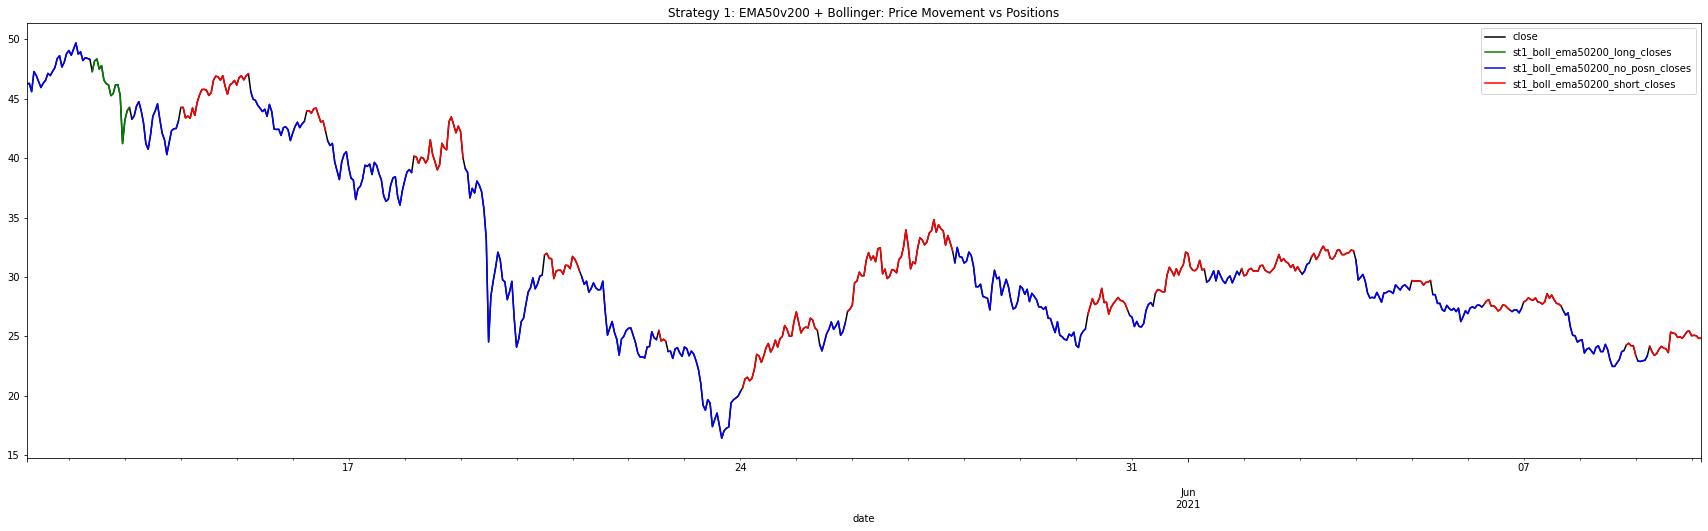

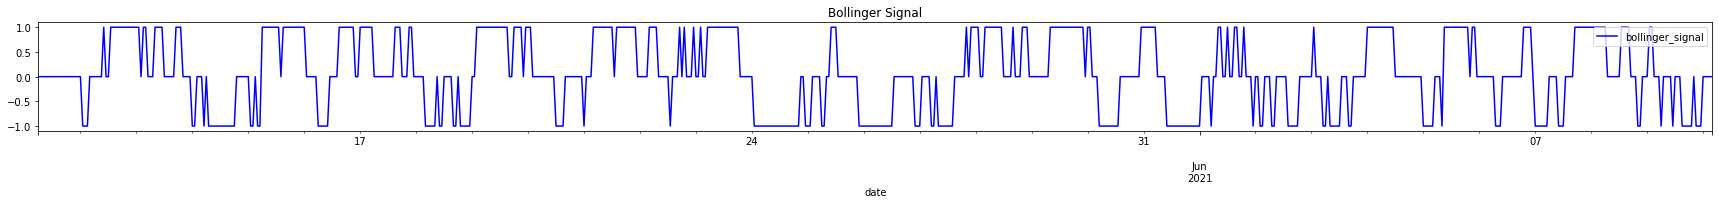

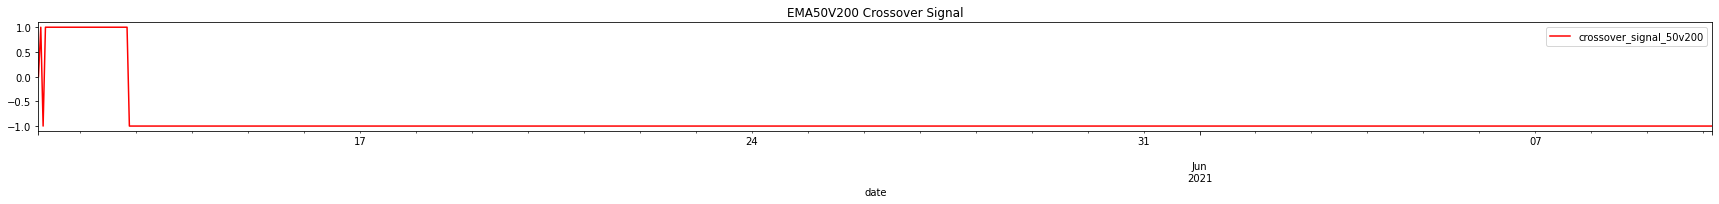

In [40]:
# PLOT IN MATPLOTLIB

display(strategy_1[['close', 'st1_boll_ema50200_long_closes', 'st1_boll_ema50200_no_posn_closes', 'st1_boll_ema50200_short_closes']].plot(figsize=(30,8), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 1: EMA50v200 + Bollinger: Price Movement vs Positions')
display(strategy_1[['bollinger_signal']].plot(figsize=(30,2), color=['b']))
plt.title('Bollinger Signal')
display(strategy_1[['crossover_signal_50v200']].plot(figsize=(30,2), color=['r']))
plt.title('EMA50V200 Crossover Signal')

## Strategy 2 - RSI + MACD

In [41]:
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal', 'macd_conservative_long_exit', 'macd_conservative_short_exit']

historical_prices_df[st2_x_var_list].head(20)

close  rsi_signal  macd_signal  \
date                                                     
2021-05-11 06:00:00  46.22390         0.0          0.0   
2021-05-11 07:00:00  46.29884         0.0          1.0   
2021-05-11 08:00:00  45.60073         0.0         -1.0   
2021-05-11 09:00:00  47.28453         0.0          1.0   
2021-05-11 10:00:00  46.95452         0.0          1.0   
2021-05-11 11:00:00  46.45000         0.0          1.0   
2021-05-11 12:00:00  45.94570         0.0          1.0   
2021-05-11 13:00:00  46.30828         0.0          1.0   
2021-05-11 14:00:00  46.55429         0.0          1.0   
2021-05-11 15:00:00  47.13410         0.0          1.0   
2021-05-11 16:00:00  46.94687         0.0          1.0   
2021-05-11 17:00:00  47.30236         0.0          1.0   
2021-05-11 18:00:00  47.62206         0.0          1.0   
2021-05-11 19:00:00  48.38680         0.0          1.0   
2021-05-11 20:00:00  48.61872         0.0          1.0   
2021-05-11 21:00:00  47.66812         0.0          1.0   
2021-05-11 22:00:00  48.07519         0.0          1.0   
2021-05-11 23:00:00  48.80319         0.0          1.0   
2021-05-12 00:00:00  49.05706         0.0          1.0   
2021-05-12 01:00:00  48.66212         0.0          1.0   

                     macd_conservative_long_exit  macd_conservative_short_exit  
date                                                                            
2021-05-11 06:00:00                          0.0                           0.0  
2021-05-11 07:00:00                          0.0                           1.0  
2021-05-11 08:00:00                         -1.0                           0.0  
2021-05-11 09:00:00                         -1.0                           0.0  
2021-05-11 10:00:00                          0.0                           1.0  
2021-05-11 11:00:00                         -1.0                           0.0  
2021-05-11 12:00:00                         -1.0                           0.0  
2021-05-11 13:00:00                         -1.0                           0.0  
2021-05-11 14:00:00                          0.0                           1.0  
2021-05-11 15:00:00                          0.0                           1.0  
2021-05-11 16:00:00                          0.0                           1.0  
2021-05-11 17:00:00                          0.0                           1.0  
2021-05-11 18:00:00                          0.0                           1.0  
2021-05-11 19:00:00                          0.0                           1.0  
2021-05-11 20:00:00                          0.0                           1.0  
2021-05-11 21:00:00                         -1.0                           0.0  
2021-05-11 22:00:00                         -1.0                           0.0  
2021-05-11 23:00:00                          0.0                           1.0  
2021-05-12 00:00:00                          0.0                           1.0  
2021-05-12 01:00:00                         -1.0                           0.0

In [42]:
# Filter by x-variable list
strategy_2 = historical_prices_df[st2_x_var_list]

# Define long and short position conditions

environment = 'none'
environments = []

for index, row in strategy_2.iterrows():

    # If RSI signal == 1, OVERSOLD. I.e. enter long position
    if (row['rsi_signal'] == 1):
        environment = "Oversold. LONG!"
        environments.append(environment)
    
    # If RSI signal == -1, OVERBOUGHT. I.e. enter short position
    elif (row['rsi_signal'] == -1):
        environment = "Overbought. SELL!"
        environments.append(environment)
    
    # Else, price is fair
    else:
        environment = "Fair price"
        environments.append(environment)

display(len(environments))
display(strategy_2.shape)
display(historical_prices_df.shape)


719

(719, 5)

(719, 53)

In [43]:
strategy_2['rsi_window'] = environments
# historical_prices_df['rsi_window'] = environments
# strategy_2[130:170]
strategy_2[50:100]

close  rsi_signal  macd_signal  \
date                                                     
2021-05-13 08:00:00  42.95477         1.0         -1.0   
2021-05-13 09:00:00  41.22402         1.0         -1.0   
2021-05-13 10:00:00  40.74371         1.0         -1.0   
2021-05-13 11:00:00  41.95278         1.0         -1.0   
2021-05-13 12:00:00  43.52829         1.0         -1.0   
2021-05-13 13:00:00  43.96705         1.0          1.0   
2021-05-13 14:00:00  44.56894         0.0          1.0   
2021-05-13 15:00:00  43.25543         0.0          1.0   
2021-05-13 16:00:00  42.10000         0.0          1.0   
2021-05-13 17:00:00  41.53864         0.0          1.0   
2021-05-13 18:00:00  40.29654         0.0         -1.0   
2021-05-13 19:00:00  41.32421         0.0         -1.0   
2021-05-13 20:00:00  42.30095         0.0         -1.0   
2021-05-13 21:00:00  42.47000         0.0          1.0   
2021-05-13 22:00:00  42.49652         0.0          1.0   
2021-05-13 23:00:00  43.14226         0.0          1.0   
2021-05-14 00:00:00  44.26324         0.0          1.0   
2021-05-14 01:00:00  44.27103         0.0          1.0   
2021-05-14 02:00:00  43.38080         0.0          1.0   
2021-05-14 03:00:00  43.54596         0.0          1.0   
2021-05-14 04:00:00  43.35558         0.0          1.0   
2021-05-14 05:00:00  44.22125         0.0          1.0   
2021-05-14 06:00:00  43.60051         0.0          1.0   
2021-05-14 07:00:00  44.69707         0.0          1.0   
2021-05-14 08:00:00  45.30000         0.0          1.0   
2021-05-14 09:00:00  45.77142         0.0          1.0   
2021-05-14 10:00:00  45.79216         0.0          1.0   
2021-05-14 11:00:00  45.71715         0.0          1.0   
2021-05-14 12:00:00  45.27235         0.0          1.0   
2021-05-14 13:00:00  45.49092         0.0          1.0   
2021-05-14 14:00:00  46.56203         0.0          1.0   
2021-05-14 15:00:00  46.90647         0.0          1.0   
2021-05-14 16:00:00  46.82824         0.0          1.0   
2021-05-14 17:00:00  46.55745         0.0          1.0   
2021-05-14 18:00:00  46.93807         0.0          1.0   
2021-05-14 19:00:00  46.05313         0.0          1.0   
2021-05-14 20:00:00  45.37960         0.0          1.0   
2021-05-14 21:00:00  46.14520         0.0          1.0   
2021-05-14 22:00:00  46.30000         0.0         -1.0   
2021-05-14 23:00:00  46.54095         0.0         -1.0   
2021-05-15 00:00:00  46.15097         0.0         -1.0   
2021-05-15 01:00:00  46.78755         0.0         -1.0   
2021-05-15 02:00:00  46.92574         0.0         -1.0   
2021-05-15 03:00:00  46.58889         0.0         -1.0   
2021-05-15 04:00:00  46.91895         0.0         -1.0   
2021-05-15 05:00:00  47.10698         0.0         -1.0   
2021-05-15 06:00:00  45.60647         0.0         -1.0   
2021-05-15 07:00:00  44.96972         0.0         -1.0   
2021-05-15 08:00:00  44.86096         0.0         -1.0   
2021-05-15 09:00:00  44.44571         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-13 08:00:00                          0.0   
2021-05-13 09:00:00                          0.0   
2021-05-13 10:00:00                          0.0   
2021-05-13 11:00:00                         -1.0   
2021-05-13 12:00:00                         -1.0   
2021-05-13 13:00:00                         -1.0   
2021-05-13 14:00:00                          0.0   
2021-05-13 15:00:00                         -1.0   
2021-05-13 16:00:00                         -1.0   
2021-05-13 17:00:00                         -1.0   
2021-05-13 18:00:00                         -1.0   
2021-05-13 19:00:00                         -1.0   
2021-05-13 20:00:00                         -1.0   
2021-05-13 21:00:00                         -1.0   
2021-05-13 22:00:00                          0.0   
2021-05-13 23:00:00                          0.0   
2021-05-14 00:00:00                          0.0   
2021-05-14 01:00:00

In [44]:
# CREATE A MACD SIGNAL SHIFT 
strategy_2['macd_signal_shift'] = strategy_2['macd_signal'].shift(1)
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-11 06:00:00  46.22390         0.0          0.0   
2021-05-11 07:00:00  46.29884         0.0          1.0   
2021-05-11 08:00:00  45.60073         0.0         -1.0   
2021-05-11 09:00:00  47.28453         0.0          1.0   
2021-05-11 10:00:00  46.95452         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-11 06:00:00                          0.0   
2021-05-11 07:00:00                          0.0   
2021-05-11 08:00:00                         -1.0   
2021-05-11 09:00:00                         -1.0   
2021-05-11 10:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-11 06:00:00                           0.0  Fair price   
2021-05-11 07:00:00                           1.0  Fair price   
2021-05-11 08:00:00                           0.0  Fair price   
2021-05-11 09:00:00                           0.0  Fair price   
2021-05-11 10:00:00                           1.0  Fair price   

                     macd_signal_shift  
date                                    
2021-05-11 06:00:00                NaN  
2021-05-11 07:00:00                0.0  
2021-05-11 08:00:00                1.0  
2021-05-11 09:00:00               -1.0  
2021-05-11 10:00:00                1.0

### Program the Conditional Logic for the Trading Strategy

### Aggresive Macd. i.e hold until the next macd cross

In [45]:
# |#   | RSI | MACD | MACDSHIFT        | INTERPRETATION                               |
# |----| ----|:----:| ----------------:|---------------------------------------------:|
# |1   | -1  |  1   |    1             |  HOLD NO POSITION                            |
# |2   | -1  |  1   |   -1             |  CLOSE SHORT                                 |
# |3   | -1  |  -1  |    1             |  ENTER SHORT                                 |
# |4   | -1  |  -1  |   -1             |  HOLD SHORT                                  |
# |6   |  0  |  1   |   -1             |  NO POSITION OR CLOSE SHORT                  |
# |5   |  0  |  1   |    1             |  HOLD POSITION                               |
# |7   |  0  |  -1  |    1             |  NO POSITION OR CLOSE LONG                   |
# |8   |  0  |  -1  |   -1             |  HOLD POSITION                               |
# |9   |  1  |  1   |    1             |  HOLD LONG                                   |
# |10  |  1  |  1   |   -1             |  ENTER LONG                                  |
# |11  |  1  |  -1  |    1             |  CLOSE LONG                                  |
# |12  |  1  |  -1  |   -1             |  HOLD NO POSITION                            |


In [46]:
st2_position_code = 0
st2_positions = []

for index, row in strategy_2.iterrows():


    ## RSI OVERSOLD SCENARIOS


    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL (1), BUY
    if (row['rsi_signal'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 1
        st2_positions.append(st2_position_code)

    
    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    


    ## RSI OVERBOUGHT SCENARIOS


    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = -1
        st2_positions.append(st2_position_code)
    
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL (1), BUY
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)



    ## RSI FAIR SCENARIOS


    # # IF RSI == FAIR (0) AND MACD GOES FROM 1 to -1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    
    # # IF RSI == FAIR (0) AND MACD GOES FROM -1 to 1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)


    ## OTHER
    # ELSE : 0 / NA
    else:
        st2_position_code = st2_position_code
        st2_positions.append(st2_position_code)


display(len(st2_positions))
display(strategy_2.shape)
display(historical_prices_df.shape)

719

(719, 7)

(719, 53)

In [47]:
strategy_2['rsi_macd_agg_position'] = st2_positions
historical_prices_df['st2_rsi_macd_agg_position'] = st2_positions
# strategy_2[130:170]
# strategy_2[400:450]
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-11 06:00:00  46.22390         0.0          0.0   
2021-05-11 07:00:00  46.29884         0.0          1.0   
2021-05-11 08:00:00  45.60073         0.0         -1.0   
2021-05-11 09:00:00  47.28453         0.0          1.0   
2021-05-11 10:00:00  46.95452         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-11 06:00:00                          0.0   
2021-05-11 07:00:00                          0.0   
2021-05-11 08:00:00                         -1.0   
2021-05-11 09:00:00                         -1.0   
2021-05-11 10:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-11 06:00:00                           0.0  Fair price   
2021-05-11 07:00:00                           1.0  Fair price   
2021-05-11 08:00:00                           0.0  Fair price   
2021-05-11 09:00:00                           0.0  Fair price   
2021-05-11 10:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  
date                                                           
2021-05-11 06:00:00                NaN                      0  
2021-05-11 07:00:00                0.0                      0  
2021-05-11 08:00:00                1.0                      0  
2021-05-11 09:00:00               -1.0                      0  
2021-05-11 10:00:00                1.0                      0

In [48]:
strategy_2['rsi_macd_agg_position_shift'] = strategy_2['rsi_macd_agg_position'].shift(1)
# strategy_2[50:100]
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-11 06:00:00  46.22390         0.0          0.0   
2021-05-11 07:00:00  46.29884         0.0          1.0   
2021-05-11 08:00:00  45.60073         0.0         -1.0   
2021-05-11 09:00:00  47.28453         0.0          1.0   
2021-05-11 10:00:00  46.95452         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-11 06:00:00                          0.0   
2021-05-11 07:00:00                          0.0   
2021-05-11 08:00:00                         -1.0   
2021-05-11 09:00:00                         -1.0   
2021-05-11 10:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-11 06:00:00                           0.0  Fair price   
2021-05-11 07:00:00                           1.0  Fair price   
2021-05-11 08:00:00                           0.0  Fair price   
2021-05-11 09:00:00                           0.0  Fair price   
2021-05-11 10:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  \
date                                                            
2021-05-11 06:00:00                NaN                      0   
2021-05-11 07:00:00                0.0                      0   
2021-05-11 08:00:00                1.0                      0   
2021-05-11 09:00:00               -1.0                      0   
2021-05-11 10:00:00                1.0                      0   

                     rsi_macd_agg_position_shift  
date                                              
2021-05-11 06:00:00                          NaN  
2021-05-11 07:00:00                          0.0  
2021-05-11 08:00:00                          0.0  
2021-05-11 09:00:00                          0.0  
2021-05-11 10:00:00                          0.0

In [49]:
st2_signal = 'NA'
st2_signal_text = 'No Position - hold'
st2_signals = []

for index, row in strategy_2.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short'
        st2_signals.append(st2_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Close Long'
        st2_signals.append(st2_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'No Position - hold'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Sell Short'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Hold Short Position'
        st2_signals.append(st2_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Close Long Position, Enter short Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Hold Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short Position, Enter Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Enter Long Position'
        st2_signals.append(st2_signal_text)


    # Else, Signal = none
    else:
        st2_signal_text = st2_signal_text
        st2_signals.append(st2_signal_text)


strategy_2['rsi_macd_agg_signals'] = st2_signals
historical_prices_df['st2_rsi_macd_agg_signals'] = st2_signals
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-11 06:00:00  46.22390         0.0          0.0   
2021-05-11 07:00:00  46.29884         0.0          1.0   
2021-05-11 08:00:00  45.60073         0.0         -1.0   
2021-05-11 09:00:00  47.28453         0.0          1.0   
2021-05-11 10:00:00  46.95452         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-11 06:00:00                          0.0   
2021-05-11 07:00:00                          0.0   
2021-05-11 08:00:00                         -1.0   
2021-05-11 09:00:00                         -1.0   
2021-05-11 10:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-11 06:00:00                           0.0  Fair price   
2021-05-11 07:00:00                           1.0  Fair price   
2021-05-11 08:00:00                           0.0  Fair price   
2021-05-11 09:00:00                           0.0  Fair price   
2021-05-11 10:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  \
date                                                            
2021-05-11 06:00:00                NaN                      0   
2021-05-11 07:00:00                0.0                      0   
2021-05-11 08:00:00                1.0                      0   
2021-05-11 09:00:00               -1.0                      0   
2021-05-11 10:00:00                1.0                      0   

                     rsi_macd_agg_position_shift rsi_macd_agg_signals  
date                                                                   
2021-05-11 06:00:00                          NaN   No Position - hold  
2021-05-11 07:00:00                          0.0   No Position - hold  
2021-05-11 08:00:00                          0.0   No Position - hold  
2021-05-11 09:00:00                          0.0   No Position - hold  
2021-05-11 10:00:00                          0.0   No Position - hold

In [50]:
# st2_long_position_closes = []
# st2_no_position_closes = []
# st2_short_position_closes = []

# st2_long_position_close = np.nan
# st2_no_position_close = np.nan
# st2_short_position_close = np.nan

# for index, row in strategy_2.iterrows():

#     # LONG / Position == 1, close = green
#     if (row['rsi_macd_agg_position'] == 1):
#         st2_long_position_closes = row['close']
#         # st2_long_position_closes.append(st2_long_position_close)

#     # LONG / Position != 1 & Position_shift == 1, close = green
#     elif (row['rsi_macd_agg_position'] != 1) & (row['rsi_macd_agg_position_shift'] == 1):
#         st2_long_position_closes = row['close']
#         # st2_long_position_closes.append(st2_long_position_close)


#     # NOPOSN / Position == 0, close = blue
#     elif (row['rsi_macd_agg_position'] == 0):
#         st2_no_position_closes = row['close']
#         # st2_no_position_closes.append(st2_no_position_close)


#     # NOPOSN / Position != 0 & Position_shift == 0, close = blue
#     elif (row['rsi_macd_agg_position'] != 0) & (row['rsi_macd_agg_position_shift'] == 0):
#         st2_no_position_closes = row['close']
#         # st2_no_position_closes.append(st2_no_position_close)


#     # SHORT / Position == -1, close = red
#     if (row['rsi_macd_agg_position'] == -1):
#         st2_short_position_closes = row['close']
#         # st2_short_position_closes.append(st2_short_position_close)


#     # SHORT / Position != -1 & Position_shift == -1, close = blue
#     elif (row['rsi_macd_agg_position'] != -1) & (row['rsi_macd_agg_position_shift'] == -1):
#         st2_short_position_closes = row['close']
#         # st2_short_position_closes.append(st2_short_position_close)


# strategy_2['rsi_macd_long_closes'] = st2_long_position_closes
# strategy_2['rsi_macd_no_posn_closes'] = st2_no_position_closes
# strategy_2['rsi_macd_short_closes'] = st2_short_position_closes


strategy_2['rsi_macd_long_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == 1, strategy_2['close'], np.nan)
strategy_2['rsi_macd_no_posn_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == 0, strategy_2['close'], np.nan)
strategy_2['rsi_macd_short_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == -1, strategy_2['close'], np.nan)
strategy_2[50:100]

close  rsi_signal  macd_signal  \
date                                                     
2021-05-13 08:00:00  42.95477         1.0         -1.0   
2021-05-13 09:00:00  41.22402         1.0         -1.0   
2021-05-13 10:00:00  40.74371         1.0         -1.0   
2021-05-13 11:00:00  41.95278         1.0         -1.0   
2021-05-13 12:00:00  43.52829         1.0         -1.0   
2021-05-13 13:00:00  43.96705         1.0          1.0   
2021-05-13 14:00:00  44.56894         0.0          1.0   
2021-05-13 15:00:00  43.25543         0.0          1.0   
2021-05-13 16:00:00  42.10000         0.0          1.0   
2021-05-13 17:00:00  41.53864         0.0          1.0   
2021-05-13 18:00:00  40.29654         0.0         -1.0   
2021-05-13 19:00:00  41.32421         0.0         -1.0   
2021-05-13 20:00:00  42.30095         0.0         -1.0   
2021-05-13 21:00:00  42.47000         0.0          1.0   
2021-05-13 22:00:00  42.49652         0.0          1.0   
2021-05-13 23:00:00  43.14226         0.0          1.0   
2021-05-14 00:00:00  44.26324         0.0          1.0   
2021-05-14 01:00:00  44.27103         0.0          1.0   
2021-05-14 02:00:00  43.38080         0.0          1.0   
2021-05-14 03:00:00  43.54596         0.0          1.0   
2021-05-14 04:00:00  43.35558         0.0          1.0   
2021-05-14 05:00:00  44.22125         0.0          1.0   
2021-05-14 06:00:00  43.60051         0.0          1.0   
2021-05-14 07:00:00  44.69707         0.0          1.0   
2021-05-14 08:00:00  45.30000         0.0          1.0   
2021-05-14 09:00:00  45.77142         0.0          1.0   
2021-05-14 10:00:00  45.79216         0.0          1.0   
2021-05-14 11:00:00  45.71715         0.0          1.0   
2021-05-14 12:00:00  45.27235         0.0          1.0   
2021-05-14 13:00:00  45.49092         0.0          1.0   
2021-05-14 14:00:00  46.56203         0.0          1.0   
2021-05-14 15:00:00  46.90647         0.0          1.0   
2021-05-14 16:00:00  46.82824         0.0          1.0   
2021-05-14 17:00:00  46.55745         0.0          1.0   
2021-05-14 18:00:00  46.93807         0.0          1.0   
2021-05-14 19:00:00  46.05313         0.0          1.0   
2021-05-14 20:00:00  45.37960         0.0          1.0   
2021-05-14 21:00:00  46.14520         0.0          1.0   
2021-05-14 22:00:00  46.30000         0.0         -1.0   
2021-05-14 23:00:00  46.54095         0.0         -1.0   
2021-05-15 00:00:00  46.15097         0.0         -1.0   
2021-05-15 01:00:00  46.78755         0.0         -1.0   
2021-05-15 02:00:00  46.92574         0.0         -1.0   
2021-05-15 03:00:00  46.58889         0.0         -1.0   
2021-05-15 04:00:00  46.91895         0.0         -1.0   
2021-05-15 05:00:00  47.10698         0.0         -1.0   
2021-05-15 06:00:00  45.60647         0.0         -1.0   
2021-05-15 07:00:00  44.96972         0.0         -1.0   
2021-05-15 08:00:00  44.86096         0.0         -1.0   
2021-05-15 09:00:00  44.44571         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-13 08:00:00                          0.0   
2021-05-13 09:00:00                          0.0   
2021-05-13 10:00:00                          0.0   
2021-05-13 11:00:00                         -1.0   
2021-05-13 12:00:00                         -1.0   
2021-05-13 13:00:00                         -1.0   
2021-05-13 14:00:00                          0.0   
2021-05-13 15:00:00                         -1.0   
2021-05-13 16:00:00                         -1.0   
2021-05-13 17:00:00                         -1.0   
2021-05-13 18:00:00                         -1.0   
2021-05-13 19:00:00                         -1.0   
2021-05-13 20:00:00                         -1.0   
2021-05-13 21:00:00                         -1.0   
2021-05-13 22:00:00                          0.0   
2021-05-13 23:00:00                          0.0   
2021-05-14 00:00:00                          0.0   
2021-05-14 01:00:00

In [51]:
## BUILDING CODE FOR MAIN GRAPH __________________________________________

# # Visualize st2_exit position relative to close price
# st2_exit = strategy_2[strategy_2['rsi_macd_agg_position'] == -1.0]['close'].hvplot.scatter(
#     color='red',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# # Visualize st2_entry position relative to close price
# st2_no_posn = strategy_2[strategy_2['rsi_macd_agg_position'] == 0]['close'].hvplot.scatter(
#     color='BLUE',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# # Visualize st2_entry position relative to close price
# st2_entry = strategy_2[strategy_2['rsi_macd_agg_position'] == 1.0]['close'].hvplot.scatter(
#     color='green',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# Visualize close price for the investment
price_closes = strategy_2[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_2['rsi_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_2['rsi_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_2['rsi_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Visualize moving averages
# moving_avgs = strategy_2[['SMA50', 'SMA100']].hvplot(
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

## CODE FOR SIGNALS GRAPHS __________________________________________



rsi_signals = historical_prices_df['rsi_signal'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

macd_signals = historical_prices_df['macd_signal'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

## CODE FOR DISPLAYING ALL GRAPHS __________________________________________

# Overlay plots
# entry_st2_exit_plot = price_closes * st2_entry * st2_no_posn * st2_exit * long_closes * noposn_closes * short_closes
entry_st2_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st2_exit_plot.opts(xaxis=None))

display(rsi_signals.opts(xaxis=None))
display(macd_signals.opts(xaxis=None))




# strategy_2.hvplot(x='date', y='close', kind='line')

:Overlay
   .Curve.I                       :Curve   [date]   (close)
   .Curve.Rsi_macd_long_closes    :Curve   [date]   (rsi_macd_long_closes)
   .Curve.Rsi_macd_no_posn_closes :Curve   [date]   (rsi_macd_no_posn_closes)
   .Curve.Rsi_macd_short_closes   :Curve   [date]   (rsi_macd_short_closes)

:Curve   [date]   (rsi_signal)

:Curve   [date]   (macd_signal)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'MACD Crossover Signal')

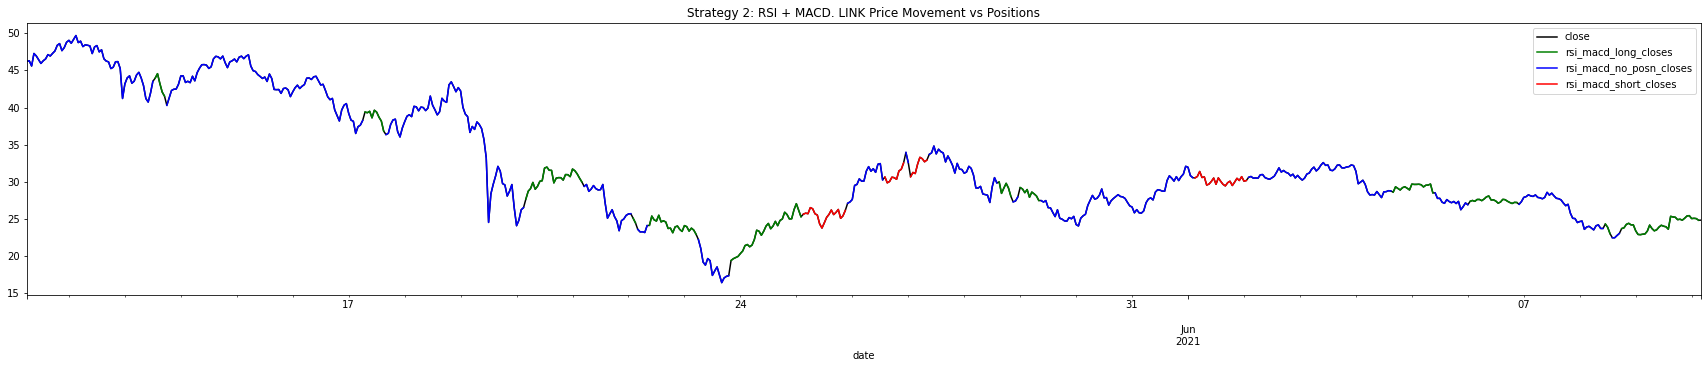

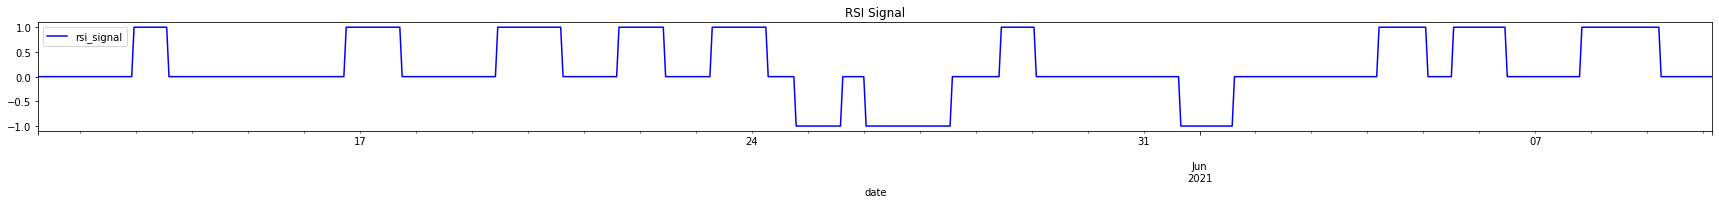

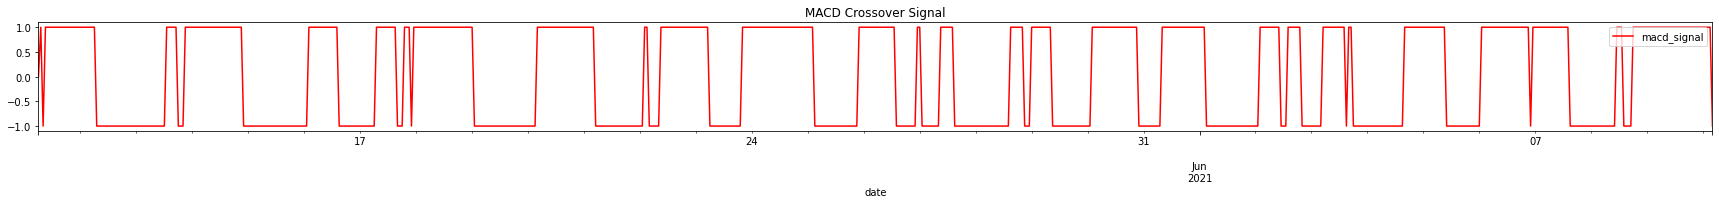

In [65]:
# PLOT IN MATPLOTLIB

display(strategy_2[['close', 'rsi_macd_long_closes', 'rsi_macd_no_posn_closes', 'rsi_macd_short_closes']].plot(figsize=(30,5), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 2: RSI + MACD. LINK Price Movement vs Positions')
display(strategy_2[['rsi_signal']].plot(figsize=(30,2), color=['b']))
plt.title('RSI Signal')
display(strategy_2[['macd_signal']].plot(figsize=(30,2), color=['r']))
plt.title('MACD Crossover Signal')

## Strategy 3 - EMA50V200 + MACD

In [53]:
historical_prices_df[st3_x_var_list].iloc[550:570]
historical_prices_df.shape

(719, 55)

In [54]:
# Filter by x-variable list
strategy_3 = historical_prices_df[st3_x_var_list]

# Define long and short position conditions
strategy_3['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_3.iloc[509:528]
strategy_3['macd_signal_shift'] = strategy_3['macd_signal'].shift(1)

strategy_3.head(5)

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-11 06:00:00  46.22390                      0.0          0.0   
2021-05-11 07:00:00  46.29884                      1.0          1.0   
2021-05-11 08:00:00  45.60073                     -1.0         -1.0   
2021-05-11 09:00:00  47.28453                      1.0          1.0   
2021-05-11 10:00:00  46.95452                      1.0          1.0   

                    bull_or_bear  macd_signal_shift  
date                                                 
2021-05-11 06:00:00         Bull                NaN  
2021-05-11 07:00:00         Bull                0.0  
2021-05-11 08:00:00         Bear                1.0  
2021-05-11 09:00:00         Bull               -1.0  
2021-05-11 10:00:00         Bull                1.0

In [55]:
strategy_3.shape

(719, 5)

In [ ]:
# POSITIONS REQUIRING CODING

# |#   | 50v200 | MACD | MACDSHIFT(-1)    | INTERPRETATION                        |
# |----| -------|:----:| ----------------:|--------------------------------------:|

# |2   | 1      |  1   |    0             |  ENTER LONG POSITION                  |
# |3   | 1      |  1   |    -1            |  CLOSE SHORT, ENTER LONG POSITION     |
# # CAN BE CONDENSED INTO
# |X   | 1      |  1   |    != 1           |  ENTER LONG POSITION                 |



# |7   | 1      | -1   |    1             |  NO POSITION / CLOSE LONG             |
# |8   | 1      | -1   |    0             |  NO POSITION / CLOSE LONG             |
# # CAN BE CONDENSED INTO
# |X   | 1      |  -1   |    != -1         |  NO POSITION                          |


# |11  | -1      |  1   |    0            |  NO POSITION / CLOSE SHORT           |
# |12  | -1      |  1   |    -1           |  NO POSITION / CLOSE SHORT           |
# # CAN BE CONDENSED INTO
# |X   | -1      |  1   |    != 1         |  NO POSITION                         |


# |16  | -1      | -1   |    1            |  CLOSE LONG, ENTER SHORT POSITION    |
# |17  | -1      | -1   |    0            |  ENTER SHORT POSITION                |
# # CAN BE CONDENSED INTO
# |X   | -1      | -1   |    != -1        |  ENTER SHORT POSITION               |


# OTHER POSITIONS

# # |1   | 1      |  1   |    1             |  HOLD LONG POSITION                   |
# # |4   | 1      |  0   |    1             |  HOLD POSITION                        | 
# # |5   | 1      |  0   |    0             |  HOLD POSITION                        |
# # |6   | 1      |  0   |    -1            |  HOLD POSITION                        |
# # |9   | 1      | -1   |    -1            |  HOLD NO POSITION                     |
# # |10  | -1      |  1   |    1            |  HOLD NO POSITION                    |
# # |13  | -1      |  0   |    1            |  HOLD POSITION                       |
# # |14  | -1      |  0   |    0            |  HOLD POSITION                       |
# # |15  | -1      |  0   |    -1           |  HOLD POSITION                       |
# # |18  | -1      | -1   |    -1           |  HOLD SHORT POSITION                 |


## Program the Conditional Logic for the Trading Strategy

In [56]:
st3_position_code = 0
st3_positions = []

for index, row in strategy_3.iterrows():
    
    # If EMA50v200 = 1 (BULL) and MACD CROSSES ABOVE SIGNAL (1) BUY
    # EMA:MACD:MACDSHIFT == 1 :  1   :    != 1         THEN:  ENTER LONG POSITION  
    if (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 1
        st3_positions.append(st3_position_code)


    # If EMA50v200 = 1 (BULL) and MACD CROSSES BELOW SIGNAL (-1) No Position
    # EMA:MACD:MACDSHIFT == 1 :  -1  :    != -1         THEN:  NO POSITION          
    elif (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)


    # If EMA50v200 = -1 (BEAR) and MACD CROSSES ABOVE SIGNAL (1) No Position
    # EMA:MACD:MACDSHIFT == -1 :  1  :    != 1         THEN:  NO POSITION          
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)



    # If EMA50v200 = -1 (BEAR) and MACD CROSSES BELOW SIGNAL (-1) SELL
    # EMA:MACD:MACDSHIFT == -1 : -1  :    != -1        THEN:  ENTER SHORT POSITION 
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = -1
        st3_positions.append(st3_position_code)


    # ELSE : 0 / NA
    else:
        st3_position_code = st3_position_code
        st3_positions.append(st3_position_code)


# Double check the dataframes have the same row lengths
display(len(st3_positions))
display(strategy_3.shape)
display(historical_prices_df.shape)    

719

(719, 5)

(719, 55)

In [57]:
strategy_3['ema50200_macd_position'] = st3_positions
historical_prices_df['st3_ema50200_macd_position'] = st3_positions
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-11 06:00:00  46.22390                      0.0          0.0   
2021-05-11 07:00:00  46.29884                      1.0          1.0   
2021-05-11 08:00:00  45.60073                     -1.0         -1.0   
2021-05-11 09:00:00  47.28453                      1.0          1.0   
2021-05-11 10:00:00  46.95452                      1.0          1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  
date                                                                         
2021-05-11 06:00:00         Bull                NaN                       0  
2021-05-11 07:00:00         Bull                0.0                       1  
2021-05-11 08:00:00         Bear                1.0                      -1  
2021-05-11 09:00:00         Bull               -1.0                       1  
2021-05-11 10:00:00         Bull                1.0                       1

### CALCULATE SIGNALS

In [58]:
strategy_3['ema50200_macd_position_shift'] = strategy_3['ema50200_macd_position'].shift(1)
strategy_3

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-11 06:00:00  46.22390                      0.0          0.0   
2021-05-11 07:00:00  46.29884                      1.0          1.0   
2021-05-11 08:00:00  45.60073                     -1.0         -1.0   
2021-05-11 09:00:00  47.28453                      1.0          1.0   
2021-05-11 10:00:00  46.95452                      1.0          1.0   
...                       ...                      ...          ...   
2021-06-10 00:00:00  25.05017                     -1.0          1.0   
2021-06-10 01:00:00  25.08719                     -1.0          1.0   
2021-06-10 02:00:00  25.05033                     -1.0          1.0   
2021-06-10 03:00:00  24.82237                     -1.0          1.0   
2021-06-10 04:00:00  24.84010                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-11 06:00:00         Bull                NaN                       0   
2021-05-11 07:00:00         Bull                0.0                       1   
2021-05-11 08:00:00         Bear                1.0                      -1   
2021-05-11 09:00:00         Bull               -1.0                       1   
2021-05-11 10:00:00         Bull                1.0                       1   
...                          ...                ...                     ...   
2021-06-10 00:00:00         Bear                1.0                       0   
2021-06-10 01:00:00         Bear                1.0                       0   
2021-06-10 02:00:00         Bear                1.0                       0   
2021-06-10 03:00:00         Bear                1.0                       0   
2021-06-10 04:00:00         Bear                1.0                      -1   

                     ema50200_macd_position_shift  
date                                               
2021-05-11 06:00:00                           NaN  
2021-05-11 07:00:00                           0.0  
2021-05-11 08:00:00                           1.0  
2021-05-11 09:00:00                          -1.0  
2021-05-11 10:00:00                           1.0  
...                                           ...  
2021-06-10 00:00:00                           0.0  
2021-06-10 01:00:00                           0.0  
2021-06-10 02:00:00                           0.0  
2021-06-10 03:00:00                           0.0  
2021-06-10 04:00:00                           0.0  

[719 rows x 7 columns]

In [59]:
st3_signal_text = 'No Position - hold'
st3_signals = []

for index, row in strategy_3.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short'
        st3_signals.append(st3_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Close Long'
        st3_signals.append(st3_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'No Position - hold'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Sell Short'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Hold Short Position'
        st3_signals.append(st3_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Close Long Position, Enter short Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Hold Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short Position, Enter Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Enter Long Position'
        st3_signals.append(st3_signal_text)


    # Else, Signal = none
    else:
        st3_signal_text = st3_signal_text
        st3_signals.append(st3_signal_text)


strategy_3['ema50200_macd_signal'] = st3_signals
historical_prices_df['st3_rsi_macd_agg_signals'] = st3_signals
# strategy_3[0:50]
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-11 06:00:00  46.22390                      0.0          0.0   
2021-05-11 07:00:00  46.29884                      1.0          1.0   
2021-05-11 08:00:00  45.60073                     -1.0         -1.0   
2021-05-11 09:00:00  47.28453                      1.0          1.0   
2021-05-11 10:00:00  46.95452                      1.0          1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-11 06:00:00         Bull                NaN                       0   
2021-05-11 07:00:00         Bull                0.0                       1   
2021-05-11 08:00:00         Bear                1.0                      -1   
2021-05-11 09:00:00         Bull               -1.0                       1   
2021-05-11 10:00:00         Bull                1.0                       1   

                     ema50200_macd_position_shift  \
date                                                
2021-05-11 06:00:00                           NaN   
2021-05-11 07:00:00                           0.0   
2021-05-11 08:00:00                           1.0   
2021-05-11 09:00:00                          -1.0   
2021-05-11 10:00:00                           1.0   

                                           ema50200_macd_signal  
date                                                             
2021-05-11 06:00:00                          No Position - hold  
2021-05-11 07:00:00                         Enter Long Position  
2021-05-11 08:00:00  ‘Close Long Position, Enter short Position  
2021-05-11 09:00:00   Close Short Position, Enter Long Position  
2021-05-11 10:00:00                          Hold Long Position

In [60]:
strategy_3['ema50v200_macd_long_closes'] = np.where(strategy_3['ema50200_macd_position'] == 1, strategy_3['close'], np.nan)
strategy_3['ema50v200_macd_no_posn_closes'] = np.where(strategy_3['ema50200_macd_position'] == 0, strategy_3['close'], np.nan)
strategy_3['ema50v200_macd_short_closes'] = np.where(strategy_3['ema50200_macd_position'] == -1, strategy_3['close'], np.nan)
# strategy_3[50:100]
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-11 06:00:00  46.22390                      0.0          0.0   
2021-05-11 07:00:00  46.29884                      1.0          1.0   
2021-05-11 08:00:00  45.60073                     -1.0         -1.0   
2021-05-11 09:00:00  47.28453                      1.0          1.0   
2021-05-11 10:00:00  46.95452                      1.0          1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-11 06:00:00         Bull                NaN                       0   
2021-05-11 07:00:00         Bull                0.0                       1   
2021-05-11 08:00:00         Bear                1.0                      -1   
2021-05-11 09:00:00         Bull               -1.0                       1   
2021-05-11 10:00:00         Bull                1.0                       1   

                     ema50200_macd_position_shift  \
date                                                
2021-05-11 06:00:00                           NaN   
2021-05-11 07:00:00                           0.0   
2021-05-11 08:00:00                           1.0   
2021-05-11 09:00:00                          -1.0   
2021-05-11 10:00:00                           1.0   

                                           ema50200_macd_signal  \
date                                                              
2021-05-11 06:00:00                          No Position - hold   
2021-05-11 07:00:00                         Enter Long Position   
2021-05-11 08:00:00  ‘Close Long Position, Enter short Position   
2021-05-11 09:00:00   Close Short Position, Enter Long Position   
2021-05-11 10:00:00                          Hold Long Position   

                     ema50v200_macd_long_closes  \
date                                              
2021-05-11 06:00:00                         NaN   
2021-05-11 07:00:00                    46.29884   
2021-05-11 08:00:00                         NaN   
2021-05-11 09:00:00                    47.28453   
2021-05-11 10:00:00                    46.95452   

                     ema50v200_macd_no_posn_closes  \
date                                                 
2021-05-11 06:00:00                        46.2239   
2021-05-11 07:00:00                            NaN   
2021-05-11 08:00:00                            NaN   
2021-05-11 09:00:00                            NaN   
2021-05-11 10:00:00                            NaN   

                     ema50v200_macd_short_closes  
date                                              
2021-05-11 06:00:00                          NaN  
2021-05-11 07:00:00                          NaN  
2021-05-11 08:00:00                     45.60073  
2021-05-11 09:00:00                          NaN  
2021-05-11 10:00:00                          NaN

In [61]:

# _________________ BUILDING MAIN GRAPH YO _________________ #

# Visualize close price for the investment
price_closes = strategy_3[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_3['ema50v200_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_3['ema50v200_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_3['ema50v200_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# _________________ OTHER SIGNAL CODE _________________ #

ema50v200sig = historical_prices_df['crossover_signal_50v200'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

macd_sig = historical_prices_df['macd_signal'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

# _________________ CALLING THE GRAPHS SON _________________ #

entry_st3_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st3_exit_plot.opts(xaxis=None))
display(ema50v200sig.opts(xaxis=None))
display(macd_sig.opts(xaxis=None))

:Overlay
   .Curve.I                             :Curve   [date]   (close)
   .Curve.Ema50v200_macd_long_closes    :Curve   [date]   (ema50v200_macd_long_closes)
   .Curve.Ema50v200_macd_no_posn_closes :Curve   [date]   (ema50v200_macd_no_posn_closes)
   .Curve.Ema50v200_macd_short_closes   :Curve   [date]   (ema50v200_macd_short_closes)

:Curve   [date]   (crossover_signal_50v200)

:Curve   [date]   (macd_signal)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'MACD Crossover Signal')

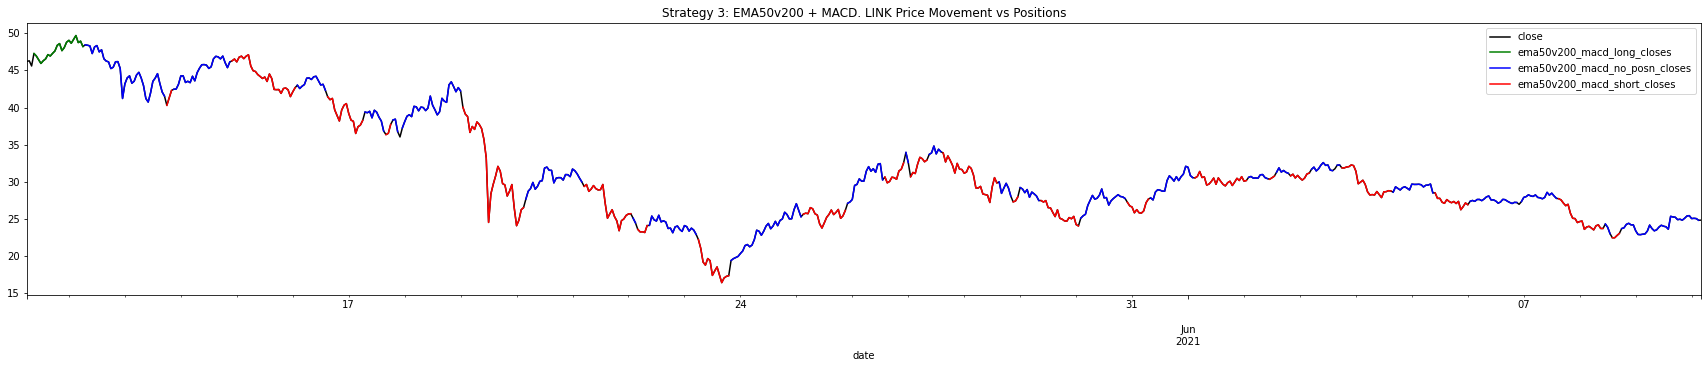

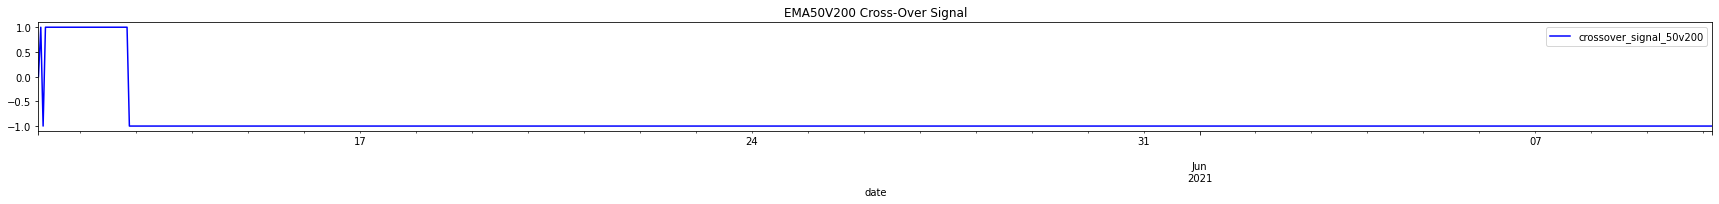

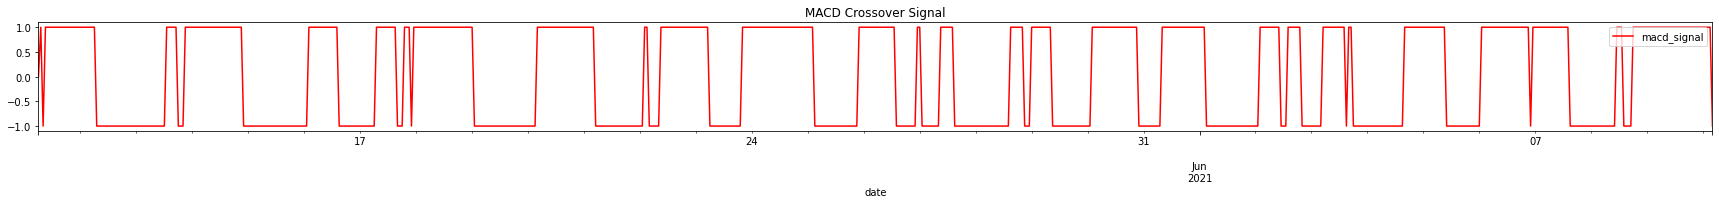

In [63]:
# PLOT IN MATPLOTLIB

display(strategy_3[['close', 'ema50v200_macd_long_closes', 'ema50v200_macd_no_posn_closes', 'ema50v200_macd_short_closes']].plot(figsize=(30,5), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 3: EMA50v200 + MACD. LINK Price Movement vs Positions')
display(strategy_3[['crossover_signal_50v200']].plot(figsize=(30,2), color=['b']))
plt.title('EMA50V200 Cross-Over Signal')
display(strategy_3[['macd_signal']].plot(figsize=(30,2), color=['r']))
plt.title('MACD Crossover Signal')

## Strategy 4 - EMA200v50 + EMA200v50

In [43]:
# Filter by x-variable list
strategy_4 = historical_prices_df[st4_x_var_list]

# Define long and short position conditions
strategy_4['ema50v200_bull_or_bear'] = np.where(strategy_4['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_4.iloc[509:528]
strategy_4.tail(5)

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-06-10 00:00:00  25.05017                     -1.0                   -1.0   
2021-06-10 01:00:00  25.08719                     -1.0                   -1.0   
2021-06-10 02:00:00  25.05033                     -1.0                   -1.0   
2021-06-10 03:00:00  24.82237                     -1.0                   -1.0   
2021-06-10 04:00:00  24.84010                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  
date                                        
2021-06-10 00:00:00                   Bear  
2021-06-10 01:00:00                   Bear  
2021-06-10 02:00:00                   Bear  
2021-06-10 03:00:00                   Bear  
2021-06-10 04:00:00                   Bear

## Program the Conditional Logic for the Trading Strategy

In [44]:
# |#   | 50v200 | 9V20 | 9V20SHIFT    | INTERPRETATION                       |
# |----| -------|:----:| ------------:|-------------------------------------:|
# |1   | 1      |  1   |    1         |  HOLD LONG POSITION                 |
# |1   | 1      |  1   |    -1        |  ENTER LONG POSITION                |
# |1   | 1      |  -1  |   1          |  CLOSE LONG POSITION                |
# |1   | 1      |  -1  |   -1         |  HOLD NO POSITION                   |
# |1   | -1     |  1   |    1         |  HOLD NO POSITION                   |
# |1   | -1     |  1   |    -1        |  CLOSE SHORT POSITION               |
# |1   | -1     |  -1  |   1          |  ENTER SHORT POSITION               |
# |1   | -1     |  -1  |   -1         |  HOLD SHORT POSITION                |

In [45]:
# Istantiate variables 
st4_position_code = 0
st4_positions = []

for index, row in strategy_4.iterrows():


    # IF BEAR (50v200 = -1) AND EMA9v20 = 1 : NO POSITION (Position = 0)
    if (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # IF BEAR (50v200 = -1) AND EMA9v20 = -1 : SHORT (Position = -1)
    elif (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = -1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = 1 : LONG (Position = 1)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = -1 : NO POSITION (Position = 0)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # ELSE
    else:
        st4_position_code = st4_position_code
        st4_positions.append(st4_position_code)


# Double check the dataframes have the same row lengths
display(len(st4_positions))
display(strategy_4.shape)
display(historical_prices_df.shape)

719

(719, 4)

(719, 53)

In [46]:
strategy_4['st4_ema200v50_ema9v20'] = st4_positions
historical_prices_df['st4_st4_ema200v50_ema9v20'] = st4_positions
# strategy_4[130:170]
strategy_4[695:830]

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-06-09 05:00:00  23.36183                     -1.0                   -1.0   
2021-06-09 06:00:00  24.17353                     -1.0                   -1.0   
2021-06-09 07:00:00  23.70598                     -1.0                   -1.0   
2021-06-09 08:00:00  23.40191                     -1.0                   -1.0   
2021-06-09 09:00:00  23.53781                     -1.0                   -1.0   
2021-06-09 10:00:00  23.90753                     -1.0                   -1.0   
2021-06-09 11:00:00  24.15363                     -1.0                   -1.0   
2021-06-09 12:00:00  24.01709                     -1.0                   -1.0   
2021-06-09 13:00:00  23.94934                     -1.0                   -1.0   
2021-06-09 14:00:00  23.62249                     -1.0                   -1.0   
2021-06-09 15:00:00  25.35434                     -1.0                   -1.0   
2021-06-09 16:00:00  25.27045                     -1.0                   -1.0   
2021-06-09 17:00:00  25.22922                     -1.0                   -1.0   
2021-06-09 18:00:00  24.90510                     -1.0                   -1.0   
2021-06-09 19:00:00  24.96471                     -1.0                   -1.0   
2021-06-09 20:00:00  24.83702                     -1.0                   -1.0   
2021-06-09 21:00:00  25.09464                     -1.0                   -1.0   
2021-06-09 22:00:00  25.39884                     -1.0                   -1.0   
2021-06-09 23:00:00  25.45000                     -1.0                   -1.0   
2021-06-10 00:00:00  25.05017                     -1.0                   -1.0   
2021-06-10 01:00:00  25.08719                     -1.0                   -1.0   
2021-06-10 02:00:00  25.05033                     -1.0                   -1.0   
2021-06-10 03:00:00  24.82237                     -1.0                   -1.0   
2021-06-10 04:00:00  24.84010                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  
date                                                               
2021-06-09 05:00:00                   Bear                     -1  
2021-06-09 06:00:00                   Bear                     -1  
2021-06-09 07:00:00                   Bear                     -1  
2021-06-09 08:00:00                   Bear                     -1  
2021-06-09 09:00:00                   Bear                     -1  
2021-06-09 10:00:00                   Bear                     -1  
2021-06-09 11:00:00                   Bear                     -1  
2021-06-09 12:00:00                   Bear                     -1  
2021-06-09 13:00:00                   Bear                     -1  
2021-06-09 14:00:00                   Bear                     -1  
2021-06-09 15:00:00                   Bear                     -1  
2021-06-09 16:00:00                   Bear                     -1  
2021-06-09 17:00:00                   Bear                     -1  
2021-06-09 18:00:00                   Bear                     -1  
2021-06-09 19:00:00                   Bear                     -1  
2021-06-09 20:00:00                   Bear                     -1  
2021-06-09 21:00:00                   Bear                     -1  
2021-06-09 22:00:00                   Bear                     -1  
2021-06-09 23:00:00                   Bear                     -1  
2021-06-10 00:00:00                   Bear                     -1  
2021-06-10 01:00:00                   Bear                     -1  
2021-06-10 02:00:00                   Bear                     -1  
2021-06-10 03:00:00                   Bear                     -1  
2021-06-10 04:00:00                   Bear                     -1

In [47]:
strategy_4['st4_ema200v50_ema9v20_shift'] = strategy_4['st4_ema200v50_ema9v20'].shift(1)
strategy_4.head(5)

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-05-11 06:00:00  46.22390                      0.0                    0.0   
2021-05-11 07:00:00  46.29884                      1.0                    1.0   
2021-05-11 08:00:00  45.60073                     -1.0                   -1.0   
2021-05-11 09:00:00  47.28453                      1.0                    1.0   
2021-05-11 10:00:00  46.95452                      1.0                    1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  \
date                                                                
2021-05-11 06:00:00                   Bull                      0   
2021-05-11 07:00:00                   Bull                      1   
2021-05-11 08:00:00                   Bear                     -1   
2021-05-11 09:00:00                   Bull                      1   
2021-05-11 10:00:00                   Bull                      1   

                     st4_ema200v50_ema9v20_shift  
date                                              
2021-05-11 06:00:00                          NaN  
2021-05-11 07:00:00                          0.0  
2021-05-11 08:00:00                          1.0  
2021-05-11 09:00:00                         -1.0  
2021-05-11 10:00:00                          1.0

In [48]:
st4_signal_text = 'No Position - hold'
st4_signals = []

for index, row in strategy_4.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short'
        st4_signals.append(st4_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Close Long'
        st4_signals.append(st4_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'No Position - hold'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Sell Short'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Hold Short Position'
        st4_signals.append(st4_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Close Long Position, Enter short Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Hold Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short Position, Enter Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Enter Long Position'
        st4_signals.append(st4_signal_text)


    # Else, Signal = none
    else:
        st4_signal_text = st4_signal_text
        st4_signals.append(st4_signal_text)


strategy_4['boll_ema50200_signals'] = st4_signals
historical_prices_df['st4_boll_ema50200_signals'] = st4_signals
# strategy_4[0:50]
strategy_4.head()

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-05-11 06:00:00  46.22390                      0.0                    0.0   
2021-05-11 07:00:00  46.29884                      1.0                    1.0   
2021-05-11 08:00:00  45.60073                     -1.0                   -1.0   
2021-05-11 09:00:00  47.28453                      1.0                    1.0   
2021-05-11 10:00:00  46.95452                      1.0                    1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  \
date                                                                
2021-05-11 06:00:00                   Bull                      0   
2021-05-11 07:00:00                   Bull                      1   
2021-05-11 08:00:00                   Bear                     -1   
2021-05-11 09:00:00                   Bull                      1   
2021-05-11 10:00:00                   Bull                      1   

                     st4_ema200v50_ema9v20_shift  \
date                                               
2021-05-11 06:00:00                          NaN   
2021-05-11 07:00:00                          0.0   
2021-05-11 08:00:00                          1.0   
2021-05-11 09:00:00                         -1.0   
2021-05-11 10:00:00                          1.0   

                                         boll_ema50200_signals  
date                                                            
2021-05-11 06:00:00                         No Position - hold  
2021-05-11 07:00:00                        Enter Long Position  
2021-05-11 08:00:00  Close Long Position, Enter short Position  
2021-05-11 09:00:00  Close Short Position, Enter Long Position  
2021-05-11 10:00:00                         Hold Long Position

In [49]:
strategy_4['rsi_macd_long_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == 1, strategy_4['close'], np.nan)
strategy_4['rsi_macd_no_posn_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == 0, strategy_4['close'], np.nan)
strategy_4['rsi_macd_short_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == -1, strategy_4['close'], np.nan)
strategy_4[50:100]

# ______________________ CODE FOR HV PLOTS MAIN GRAPH ______________________ #


# Visualize close price for the investment
price_closes = strategy_4[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_4['rsi_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_4['rsi_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_4['rsi_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______________________ OTHER SIGNALS CODE ______________________ #


em50v200sign = strategy_4['crossover_signal_50v200'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

em9v20sign = strategy_4['crossover_signal_9v20'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______________________ CALL PLOTS ______________________ #

entry_st2_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st2_exit_plot.opts(xaxis=None))
display(em50v200sign.opts(xaxis=None))
display(em9v20sign.opts(xaxis=None))


:Overlay
   .Curve.I                       :Curve   [date]   (close)
   .Curve.Rsi_macd_long_closes    :Curve   [date]   (rsi_macd_long_closes)
   .Curve.Rsi_macd_no_posn_closes :Curve   [date]   (rsi_macd_no_posn_closes)
   .Curve.Rsi_macd_short_closes   :Curve   [date]   (rsi_macd_short_closes)

:Curve   [date]   (crossover_signal_50v200)

:Curve   [date]   (crossover_signal_9v20)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'EMA9V20 Cross-Over Signal')

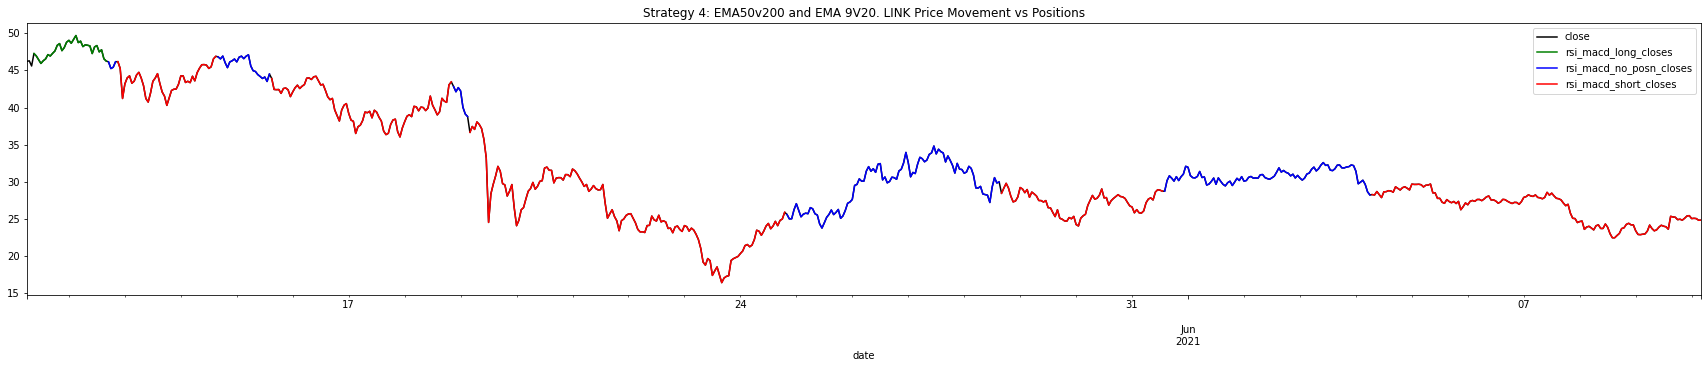

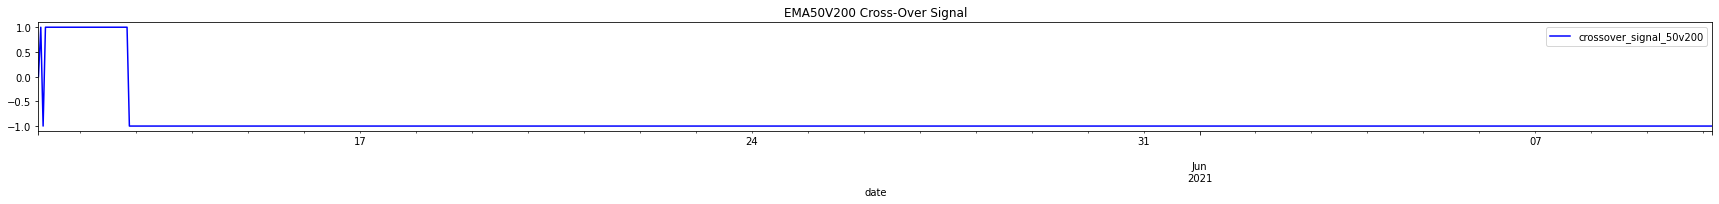

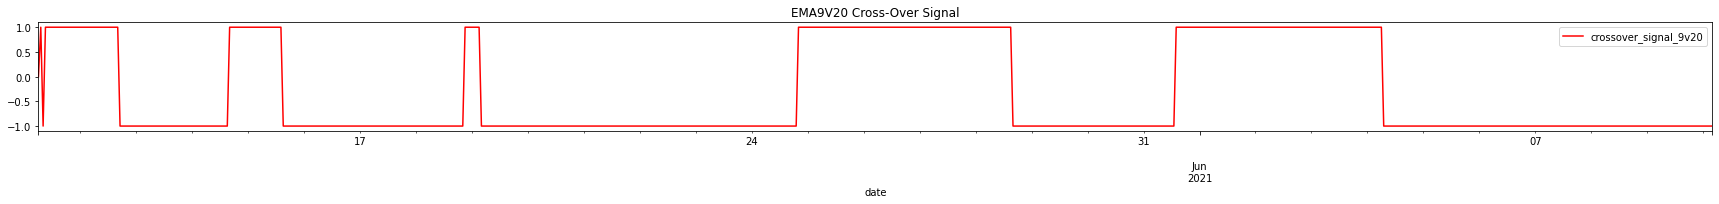

In [52]:
# PLOT IN MATPLOTLIB

display(strategy_4[['close', 'rsi_macd_long_closes', 'rsi_macd_no_posn_closes', 'rsi_macd_short_closes']].plot(figsize=(30,5), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 4: EMA50v200 and EMA 9V20. LINK Price Movement vs Positions')
display(strategy_4[['crossover_signal_50v200']].plot(figsize=(30,2), color=['b']))
plt.title('EMA50V200 Cross-Over Signal')
display(strategy_4[['crossover_signal_9v20']].plot(figsize=(30,2), color=['r']))
plt.title('EMA9V20 Cross-Over Signal')

In [50]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal
st1_boll_ema50200_position
st1_boll_ema50200_signals
st4_st4_ema200v50_ema9v20
st4_boll_ema50200_signals


# FROM THIS POINT ONWARDS, ALEX HASN'T DONE ANYTHING

### Shift the DataFrame Index by 1

In [65]:
# historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
# historical_prices_df[x_var_list].tail()

### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [66]:
# # Drop NAs and replace positive/negative infinity values
# historical_prices_df.dropna(subset=x_var_list, inplace=True)
# historical_prices_df.dropna(subset=['daily_return'], inplace=True)
# historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
# historical_prices_df.head()

### Construct the Dependent Variable

In [67]:
# historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
# historical_prices_df.head()

### Assign Training and Testing Windows